# Pokemon Go Stats

![pokemon](https://upload.wikimedia.org/wikipedia/commons/thumb/9/98/International_Pok%C3%A9mon_logo.svg/1200px-International_Pok%C3%A9mon_logo.svg.png)

Importing libraries that will be used

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import urllib.request

from PIL import Image
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

Setting the default style of seaborn as the style of the charts that we will build here.

In [2]:
sns.set()

Setting the display precision of the pandas `DataFrame`

In [3]:
pd.set_option("display.precision", 2)

Reading the `.csv` file

In [4]:
df_pokemon = pd.read_csv("dataset\pokemon.csv")

Dataset source: [Pokemon dataset](https://www.kaggle.com/datasets/calebreigada/pokemon)

In [5]:
df_pokemon.head()

,number,pokemon_name,pic_url,main_type,secondary_type,region,category,height,weight,pokemon_family,...,resistance,weakness,wild_avail,egg_avail,raid_avail,research_avail,shiny,shadow,pkedex_desc,poss_attacks
0,1,Bulbasaur,https://static.wikia.nocookie.net/pokemongo/im...,Grass,Poison,Kanto,Seed,0.7 m,6.9 kg,Bulbasaur family,...,"{'62.5%': ['Electric', 'Fairy', 'Fighting', 'W...","{'160%': ['Fire', 'Flying', 'Ice', 'Psychic']}",Yes,No,Formerly (1st tier level),Yes,Yes,Yes,Bulbasaur can be seen napping in bright sunlig...,"['Tackle', 'Vine Whip', 'Power Whip', 'Seed Bo..."
1,2,Ivysaur,https://static.wikia.nocookie.net/pokemongo/im...,Grass,Poison,Kanto,Seed,1 m,13 kg,Bulbasaur family,...,"{'62.5%': ['Electric', 'Fairy', 'Fighting', 'W...","{'160%': ['Fire', 'Flying', 'Ice', 'Psychic']}",Yes,No,Formerly (1st tier level),No,Yes,Yes,There is a bud on this Pokémon's back. To supp...,"['Razor Leaf', 'Vine Whip', 'Power Whip', 'Slu..."
2,3,Venusaur,https://static.wikia.nocookie.net/pokemongo/im...,Grass,Poison,Kanto,Seed,2 m,100 kg,Bulbasaur family,...,"{'62.5%': ['Electric', 'Fairy', 'Fighting', 'W...","{'160%': ['Fire', 'Flying', 'Ice', 'Psychic']}",Yes,No,Formerly (3rd tier level),Formerly,Yes,Yes,Standard Pokédex description\nThere is a large...,"['Razor Leaf', 'Vine Whip', 'Petal Blizzard', ..."
3,4,Charmander,https://static.wikia.nocookie.net/pokemongo/im...,Fire,NaN,Kanto,Lizard,0.6 m,8.5 kg,Charmander family,...,"{'62.5%': ['Bug', 'Fairy', 'Fire', 'Grass', 'I...","{'160%': ['Ground', 'Rock', 'Water']}",Yes,No,Formerly (1st tier level),Yes,Yes,Yes,The flame that burns at the tip of its tail is...,"['Ember', 'Scratch', 'Flame Burst', 'Flame Cha..."
4,5,Charmeleon,https://static.wikia.nocookie.net/pokemongo/im...,Fire,NaN,Kanto,Flame,1.1 m,19 kg,Charmander family,...,"{'62.5%': ['Bug', 'Fairy', 'Fire', 'Grass', 'I...","{'160%': ['Ground', 'Rock', 'Water']}",Yes,No,Formerly (2nd tier level),Formerly,Yes,Yes,Charmeleon mercilessly destroys its foes using...,"['Ember', 'Fire Fang', 'Scratch', 'Fire Punch'..."


In [6]:
df_pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770 entries, 0 to 769
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   number          770 non-null    int64 
 1   pokemon_name    770 non-null    object
 2   pic_url         770 non-null    object
 3   main_type       770 non-null    object
 4   secondary_type  376 non-null    object
 5   region          770 non-null    object
 6   category        770 non-null    object
 7   height          770 non-null    object
 8   weight          770 non-null    object
 9   pokemon_family  770 non-null    object
 10  attack          770 non-null    int64 
 11  defense         770 non-null    int64 
 12  stamina         770 non-null    int64 
 13  cp_range        770 non-null    object
 14  hp_range        770 non-null    object
 15  capture_rate    700 non-null    object
 16  flee_rate       700 non-null    object
 17  male_perc       611 non-null    object
 18  female_per

Number of pokemons available in the dataset

In [7]:
df_pokemon["number"].count()

770

The total number of different pokemons in this dataset is equal to 770.

Number of regions of the pokemons

In [8]:
regions_array = df_pokemon["region"].unique()
len(regions_array)

9

The 770 pokemons in this datebase are located in 9 different regions.

In [9]:
print(regions_array)

['Kanto' 'Johto' 'Hoenn' 'Sinnoh' 'Unova' 'Kalos' 'Alola' 'Unknown'
 'Galar']


Number of main types of the pokemons

checking if there are `NaN` or `None` entries in the `Series`

In [10]:
df_pokemon["main_type"].isna().sum()

0

In [11]:
pokemon_main_type_array = df_pokemon["main_type"].unique()
len(pokemon_main_type_array)

18

There are 18 different types of main types for the 770 pokemons.

In [12]:
print(pokemon_main_type_array)

['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying']


Number of secondary types of the pokemons

checking if there are `NaN` or `None` entries in the `Series`

In [13]:
df_pokemon["secondary_type"].isna().sum()

394

We want to exclude the `NaN` or `None` entries in the `secondary_type` column to see the real value of secondary types.

In [14]:
pokemon_secondary_type_array = df_pokemon[~df_pokemon["secondary_type"].isna()]["secondary_type"].unique()
len(pokemon_secondary_type_array)

18

There are 18 different types of secondary types for the 770 pokemons.

In [15]:
print(pokemon_secondary_type_array)

['Poison' 'Flying' 'Ground' 'Fairy' 'Grass' 'Fighting' 'Psychic' 'Steel'
 'Ice' 'Rock' 'Water' 'Electric' 'Fire' 'Dragon' 'Dark' 'Ghost' 'Bug'
 'Normal']


Number of pokemons category

checking if there are `NaN` or `None` entries in the `Series`

In [16]:
df_pokemon["category"].isna().sum()

0

In [17]:
pokemon_categories = df_pokemon["category"].unique()
len(pokemon_categories)

476

The 770 pokemons are cataloged in 476 different types of categories.

In [18]:
print(pokemon_categories)

['Seed' 'Lizard' 'Flame' 'Tiny' 'Turtle' 'Shellfish' 'Worm' 'Cocoon'
 'Butterfly' 'Hairy' 'Poison' 'Bird' 'Mouse' 'Beak' 'Snake' 'Cobra'
 'Drill' 'Fairy' 'Fox' 'Balloon' 'Bat' 'Weed' 'Flower' 'Mushroom' 'Insect'
 'Mole' 'Scratch' 'Classy' 'Duck' 'Pig' 'Puppy' 'Legendary' 'Tadpole'
 'Psi' 'Superpower' 'Flycatcher' 'Jellyfish' 'Rock' 'Megaton' 'Fire'
 'Dopey' 'Hermit' 'Magnet' 'Wild' 'Twin' 'Triple' 'Sea' 'Sludge' 'Bivalve'
 'Gas' 'Shadow' 'Hypnosis' 'River' 'Pincer' 'Ball' 'Egg' 'Coconut'
 'Lonely' 'Bone' 'Kicking' 'Punching' 'Licking' 'Spikes' 'Vine' 'Parent'
 'Dragon' 'Goldfish' 'Star' 'Mysterious' 'Barrier' 'Mantis' 'Human'
 'Electric' 'Spitfire' 'Stag' 'Fish' 'Atrocious' 'Transport' 'Transform'
 'Evolution' 'Bubble' 'Lightning' 'Virtual' 'Spiral' 'Fossil' 'Sleeping'
 'Freeze' 'Genetic' 'New' 'Leaf' 'Herb' 'Volcano' 'Big' 'Scout' 'Long'
 'Owl' 'Five' 'String' 'Angler' 'Light' 'Spike' 'Happiness' 'Mystic'
 'Wool' 'Aqua' 'Imitation' 'Frog' 'Cottonweed' 'Sun' 'Clear' 'Water'
 'Moonlight

From the output of `info()` method, we can see there are some columns that should be represented by a number (`int` or `float`), but they are represented as an `object` type. Then, here we have to treat the data and convert it to the correct data type. (For instance: the column height)

Converting the columns height and weight to `float`

In [19]:
height_array = df_pokemon["height"].str.split()
weight_array = df_pokemon["weight"].str.split()

for index, row in enumerate(height_array):
    
    df_pokemon["height"][index] = row[0]

for index, row in enumerate(weight_array):
    
    df_pokemon["weight"][index] = row[0]
    
df_pokemon["height"] = df_pokemon["height"].astype(float)
df_pokemon["weight"] = df_pokemon["weight"].astype(float)

df_pokemon = df_pokemon.rename(columns = {"height": f"height ({height_array[0][1]})", "weight": f"weight ({weight_array[0][1]})"})

C:\Users\josev\AppData\Local\Temp\ipykernel_19520\2544514374.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pokemon["height"][index] = row[0]
C:\Users\josev\AppData\Local\Temp\ipykernel_19520\2544514374.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pokemon["weight"][index] = row[0]


Converting the columns cp_range and hp_range in four new columns (hp_min, hp_max, cp_min and cp_max) where the entries are `int`.

In [20]:
df_pokemon[["hp_min", "hp_max"]] = df_pokemon["hp_range"].str.split("-", expand = True)
df_pokemon[["cp_min", "cp_max"]] = df_pokemon["cp_range"].str.split("-", expand = True)

In [21]:
df_pokemon["cp_max"] = df_pokemon["cp_max"].str.replace(",", "")

In [22]:
df_pokemon[["hp_min", "hp_max", "cp_min", "cp_max"]] = df_pokemon[["hp_min", "hp_max", "cp_min", "cp_max"]].astype(int)

Deleting the old columns.

In [23]:
del df_pokemon["cp_range"]
del df_pokemon["hp_range"]

Converting the columns capture_rate, flee_rate, male_perc and female_perc to `float`.

In [24]:
df_pokemon["capture_rate"].fillna(value = "0%", inplace = True)
df_pokemon["flee_rate"].fillna(value = "0%", inplace = True)
df_pokemon["male_perc"].fillna(value = "0%", inplace = True)
df_pokemon["female_perc"].fillna(value = "0%", inplace = True)

In [25]:
df_pokemon["capture_rate"] = df_pokemon["capture_rate"].str.replace("%", "")
df_pokemon["flee_rate"] = df_pokemon["flee_rate"].str.replace("%", "")
df_pokemon["male_perc"] = df_pokemon["male_perc"].str.replace("%", "")
df_pokemon["female_perc"] = df_pokemon["female_perc"].str.replace("%", "")

In [26]:
df_pokemon["capture_rate"] = df_pokemon["capture_rate"].astype(float)
df_pokemon["flee_rate"] = df_pokemon["flee_rate"].astype(float)
df_pokemon["male_perc"] = df_pokemon["male_perc"].astype(float)
df_pokemon["female_perc"] = df_pokemon["female_perc"].astype(float)

Renaming the columns

In [27]:
df_pokemon = df_pokemon.rename(columns = {"capture_rate": "capture_rate (%)", "flee_rate": "flee_rate (%)", "male_perc": "male_perc (%)", "female_perc": "female_perc (%)"})

## Exploring data

### How many pokemons are there in each region?

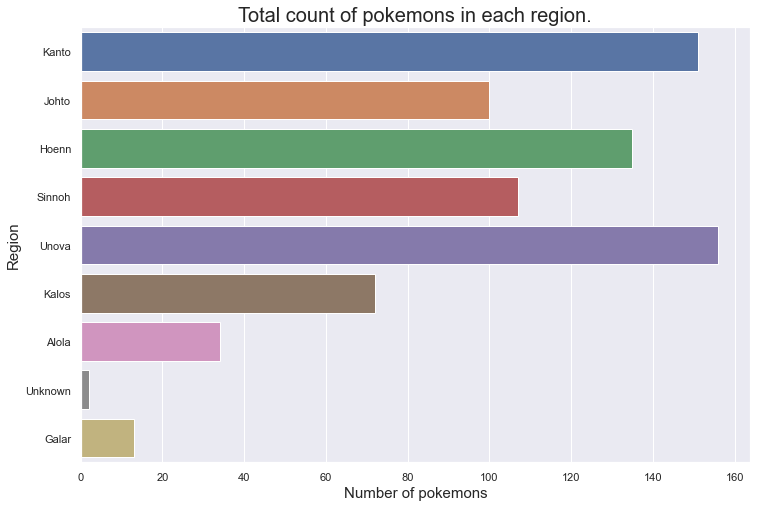

In [28]:
counts = []

for region in regions_array:
    
    counts.append(df_pokemon.loc[df_pokemon["region"] == region, "number"].count())

fig, ax = plt.subplots()

ax = sns.barplot(x = counts, y = regions_array)
ax.set_xlabel("Number of pokemons", fontsize = 15)
ax.set_ylabel("Region", fontsize = 15)
ax.set_title("Total count of pokemons in each region.", fontsize = 20)
fig.set_size_inches((12, 8))
plt.show()

## How many pokemons of each main type are there in each region?

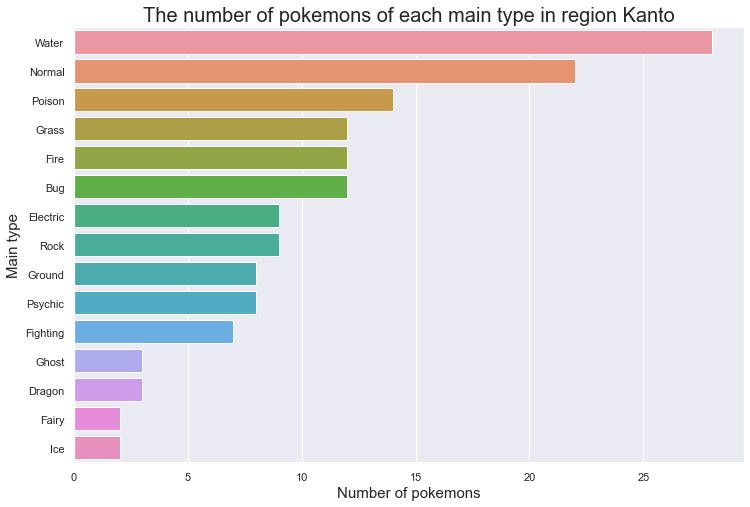

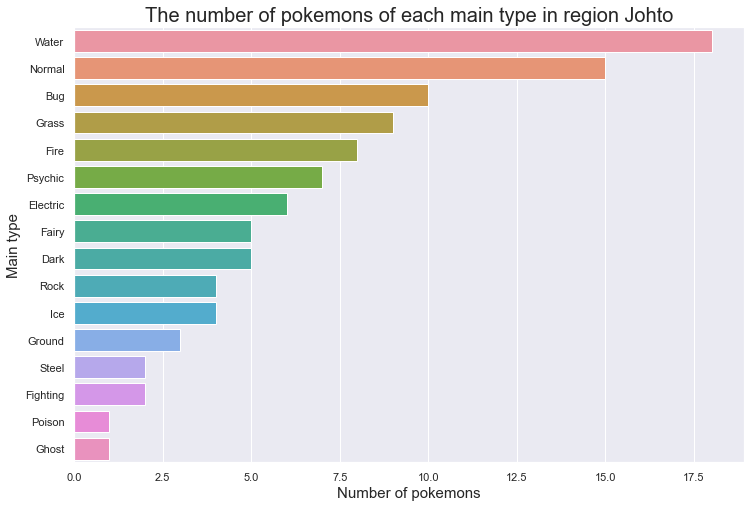

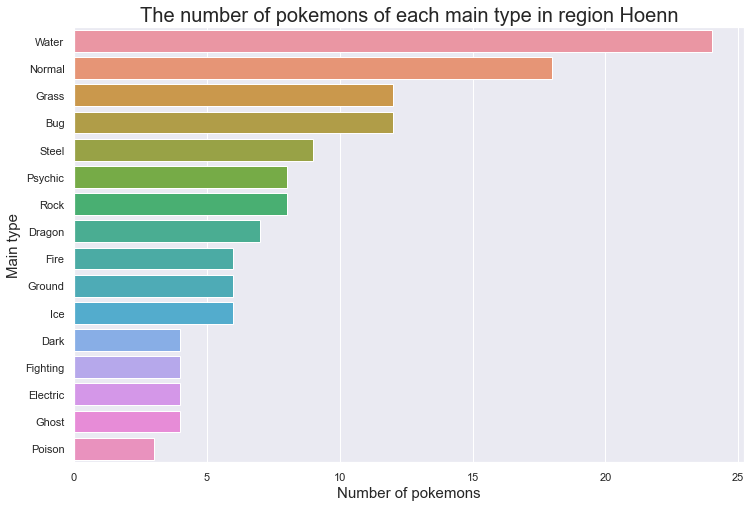

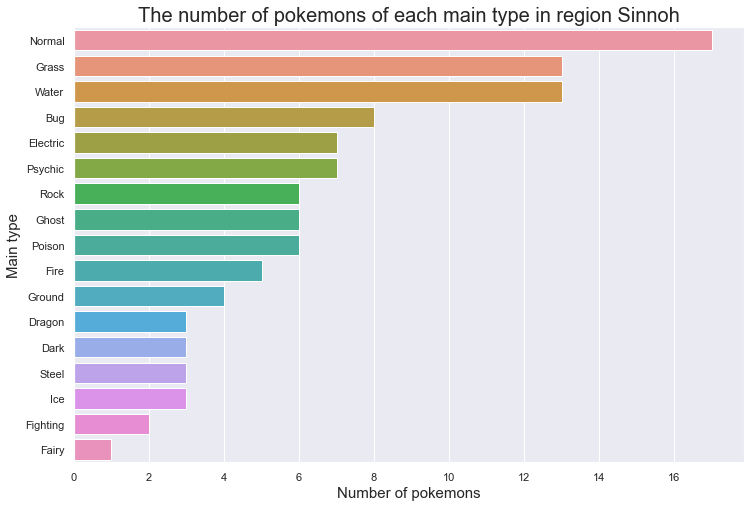

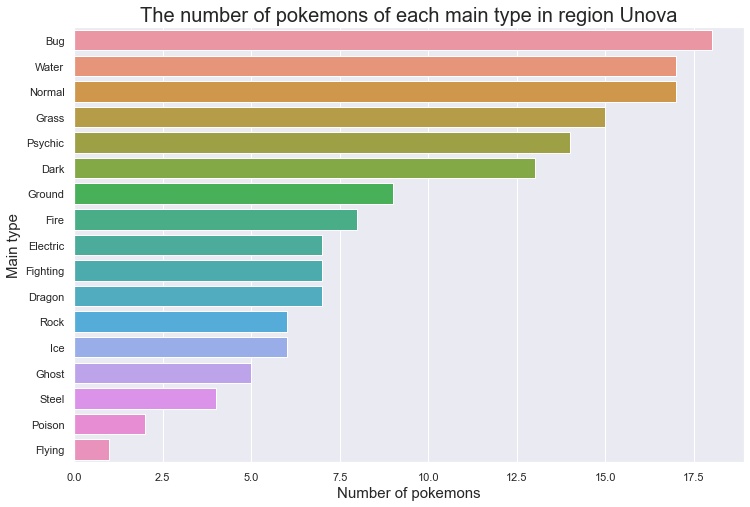

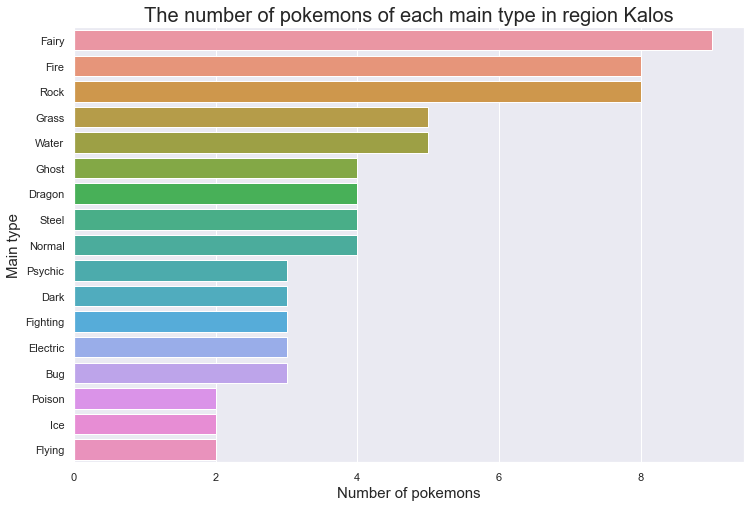

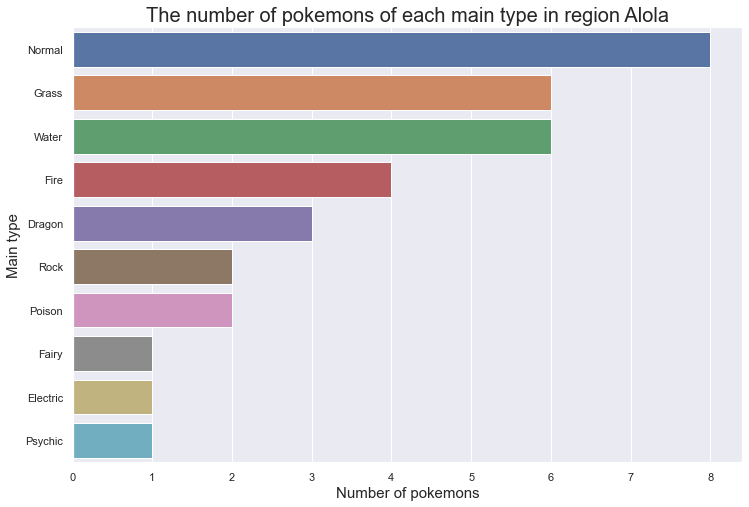

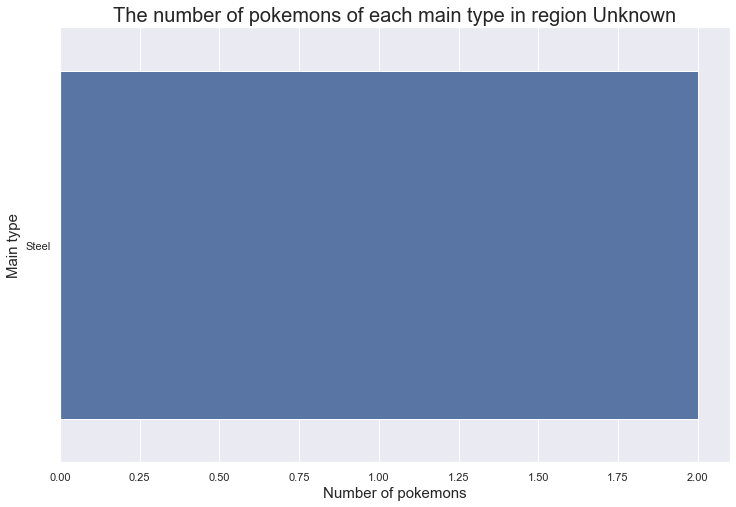

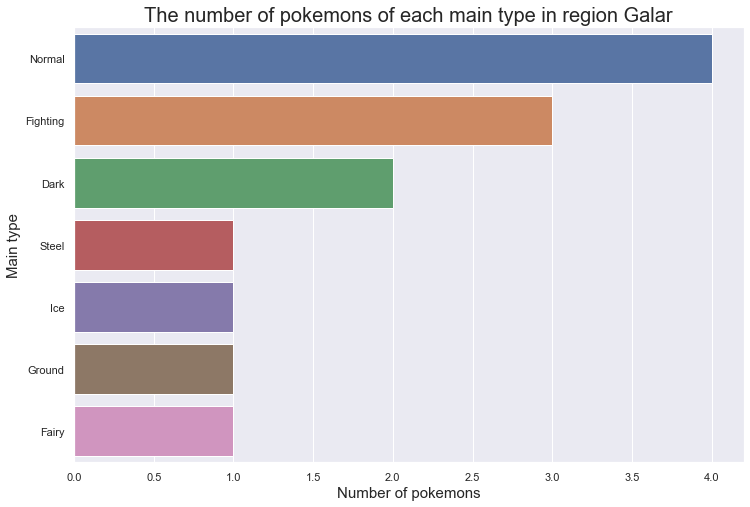

In [29]:
for region in regions_array:
    
    fig, ax = plt.subplots()
    ax = sns.barplot(y = df_pokemon.loc[df_pokemon["region"] == region, "main_type"].value_counts().index, x = df_pokemon.loc[df_pokemon["region"] == region, "main_type"].value_counts())
    ax.set_xlabel("Number of pokemons", fontsize = 15)
    ax.set_ylabel("Main type", fontsize = 15)
    ax.set_title(f"The number of pokemons of each main type in region {region}", fontsize = 20)
    fig.set_size_inches((12, 8))

plt.show()

## How many pokemons of each main type are there in the regions?

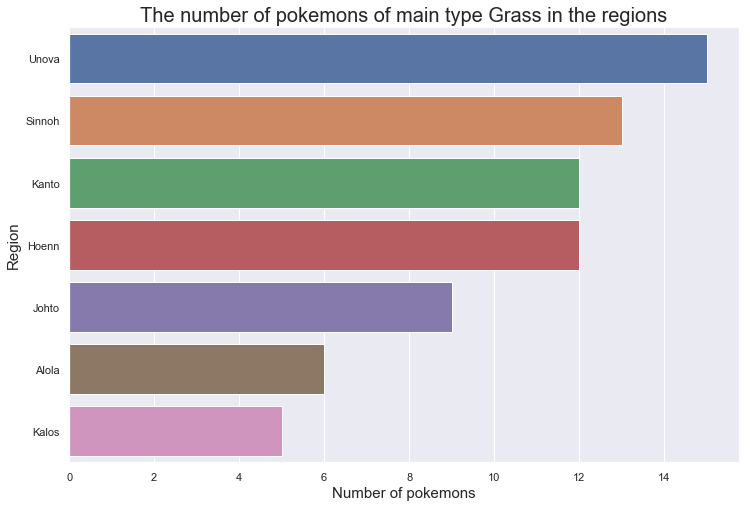

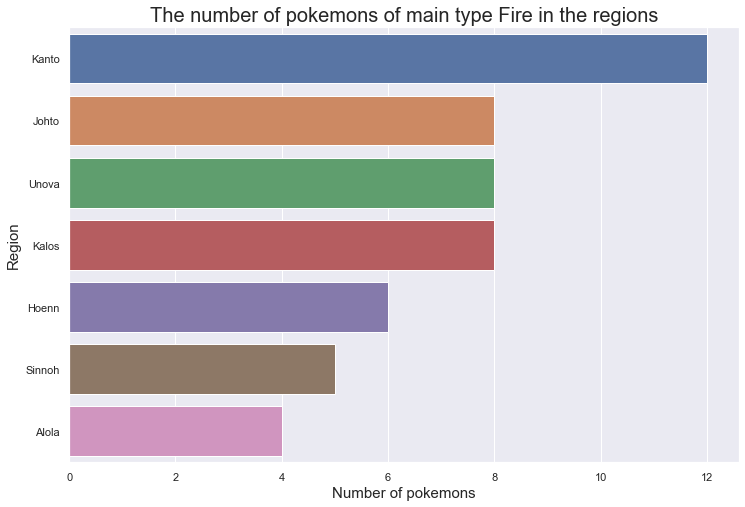

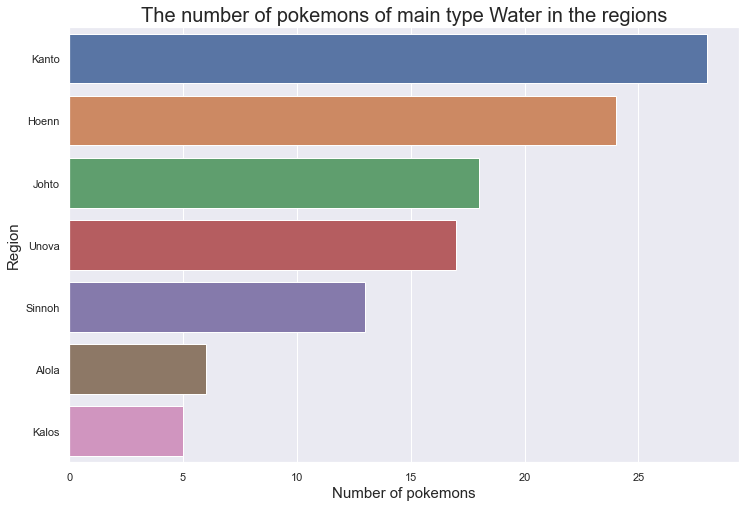

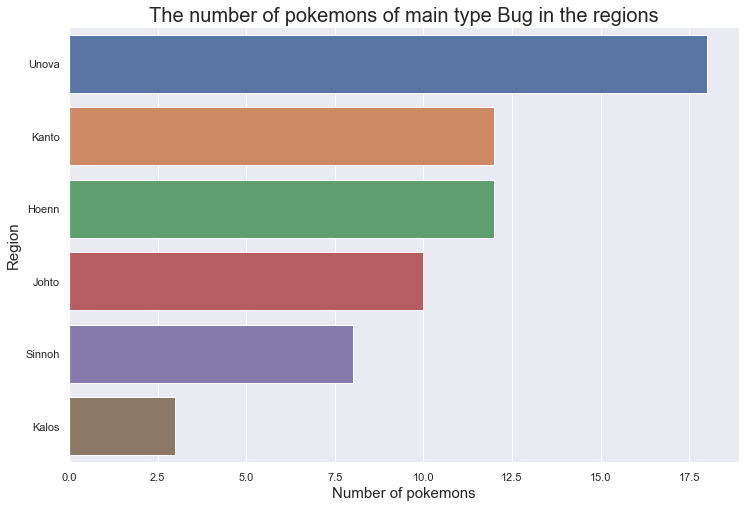

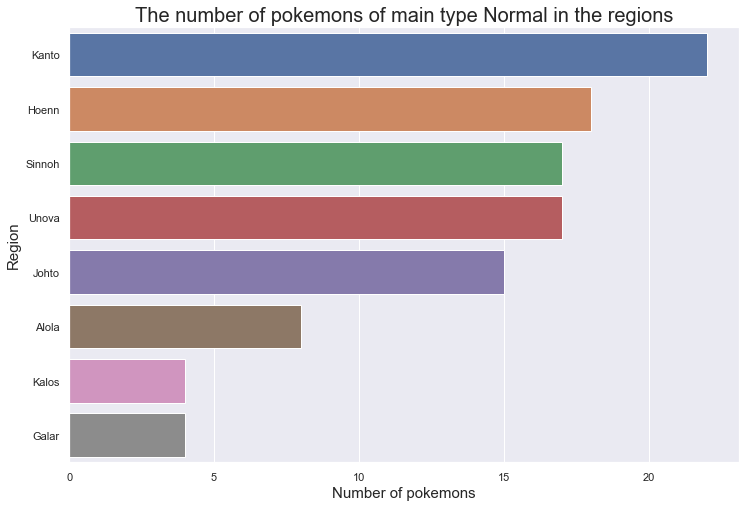

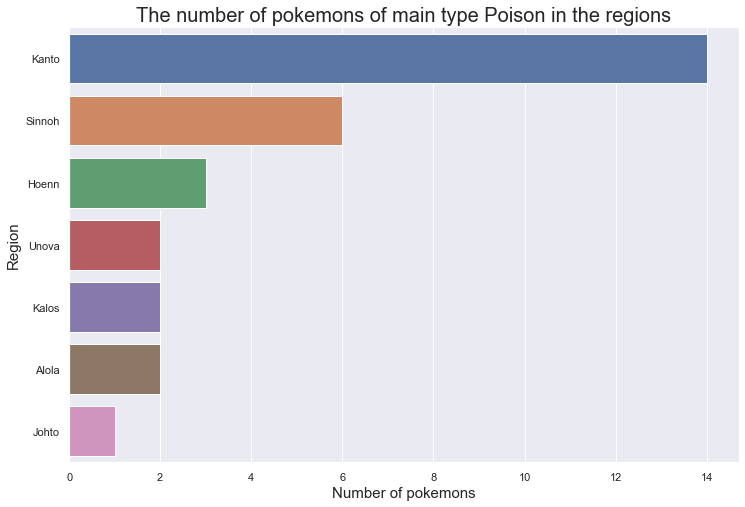

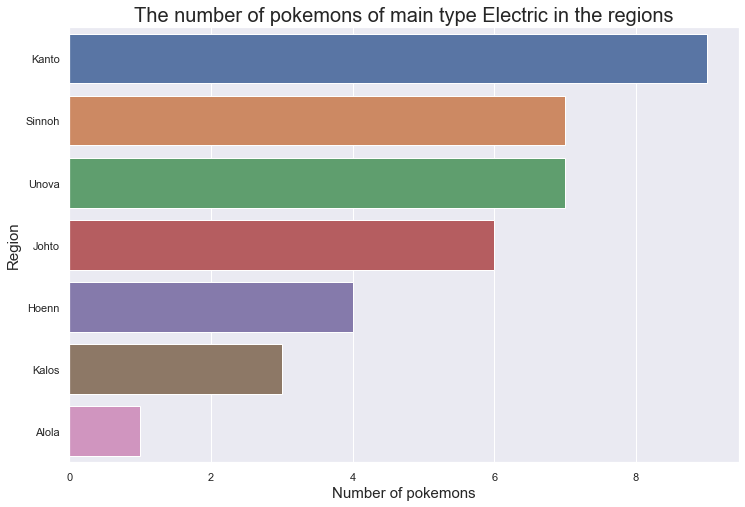

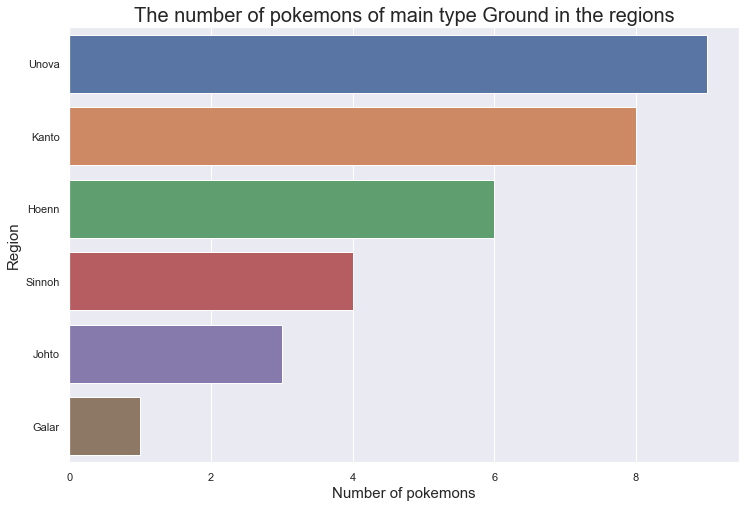

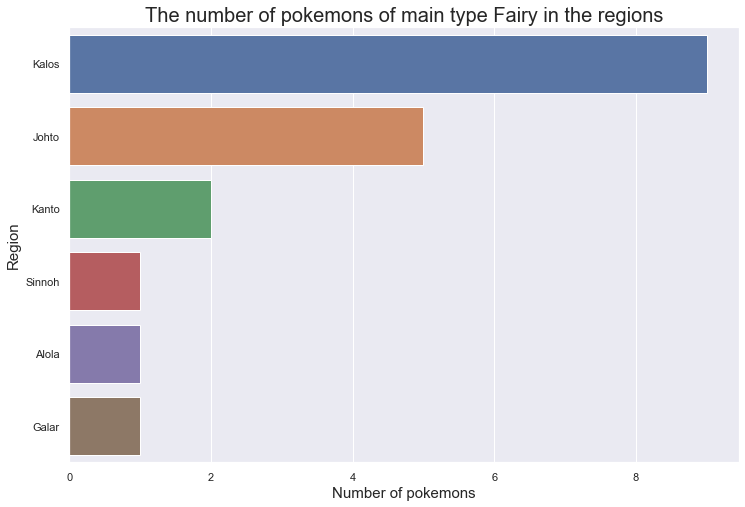

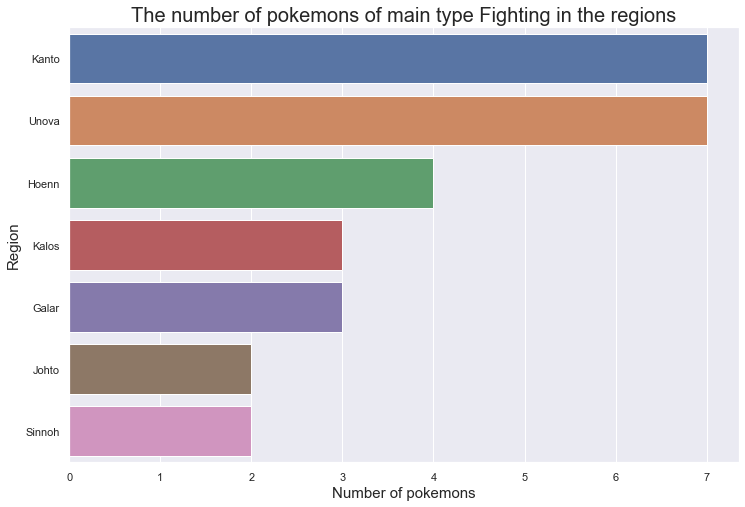

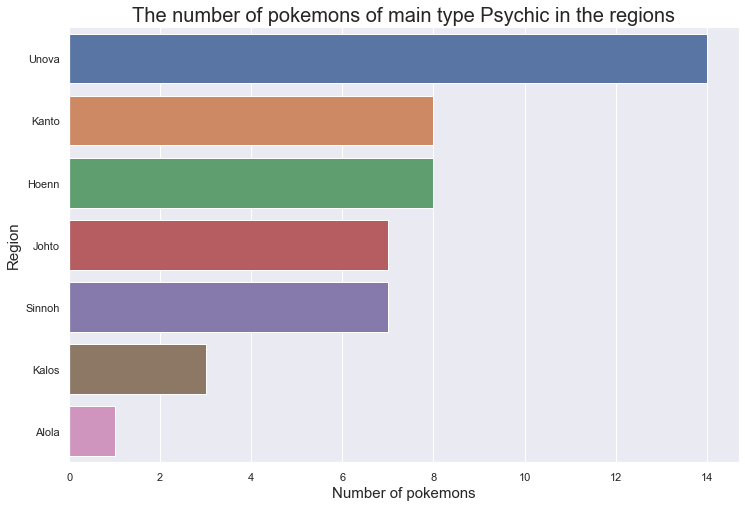

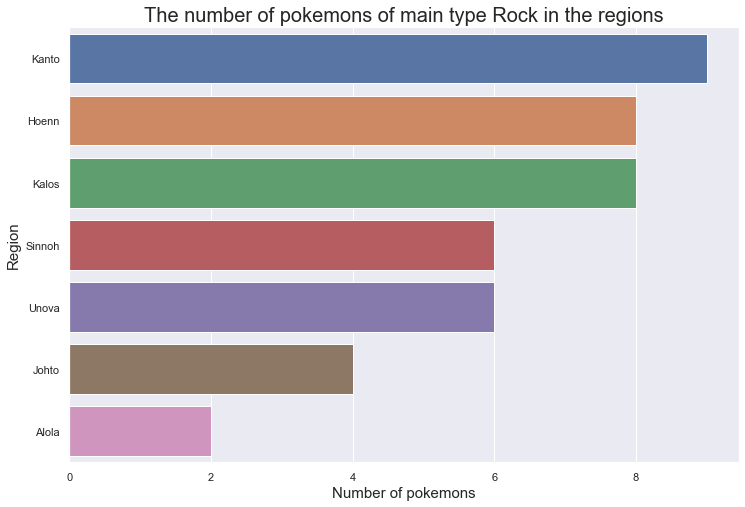

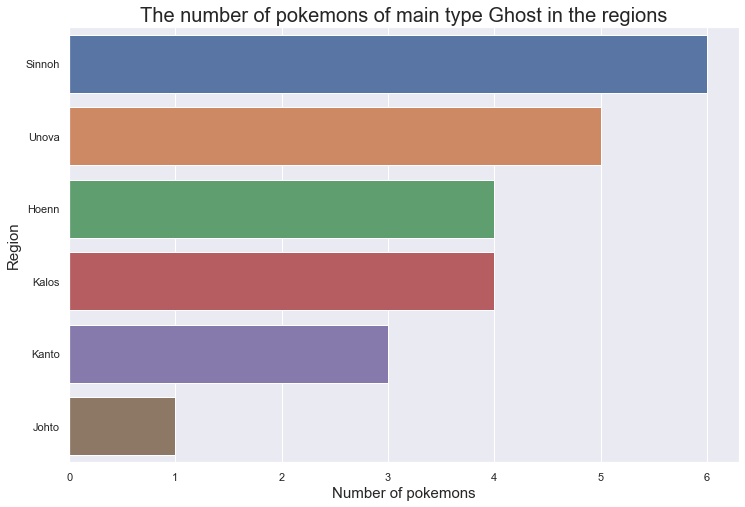

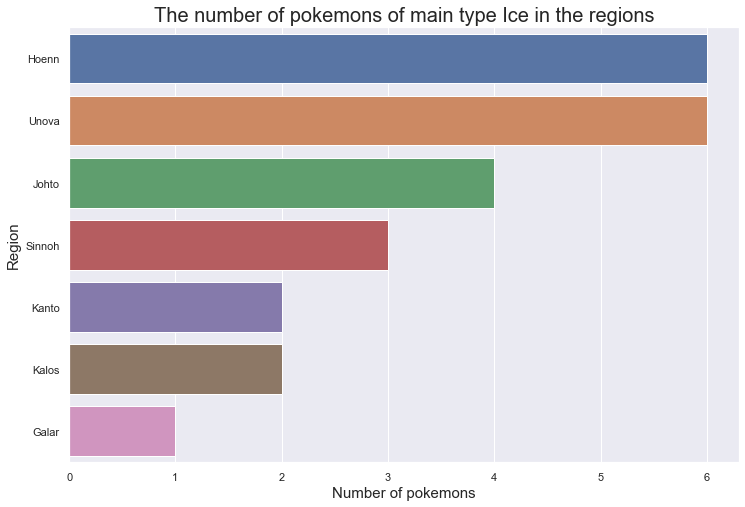

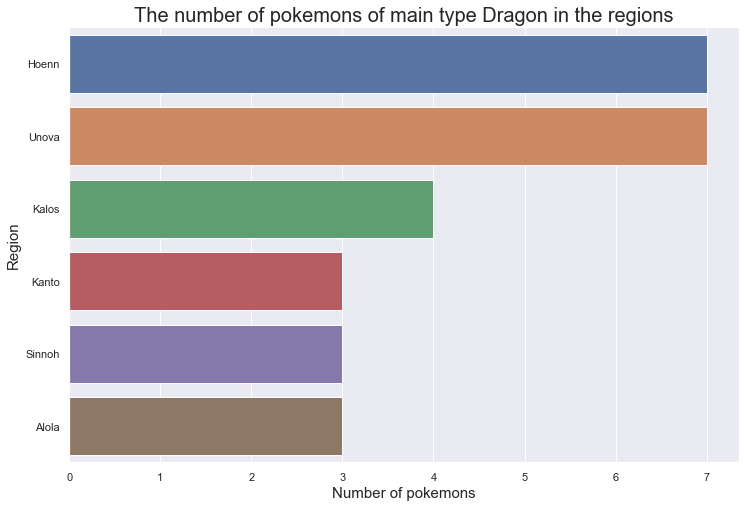

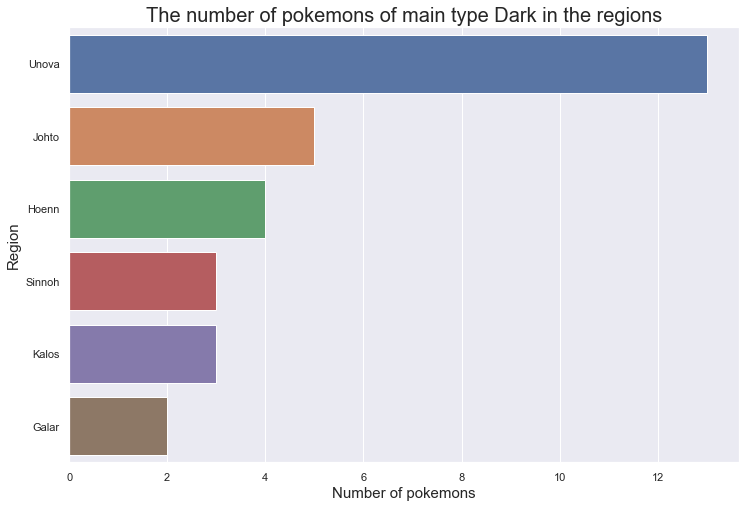

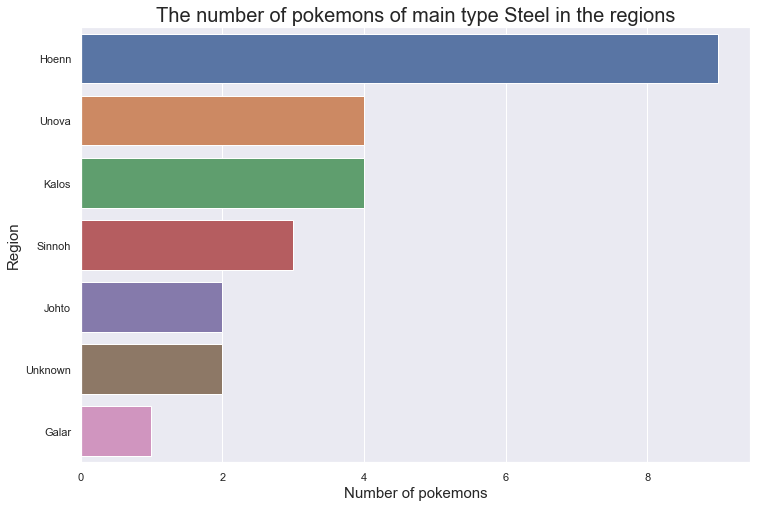

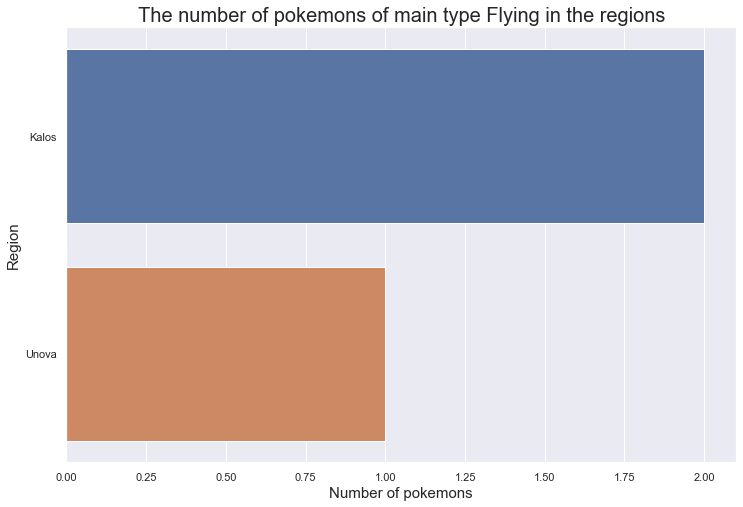

In [30]:
for main in pokemon_main_type_array:

    fig, ax = plt.subplots()
    ax = sns.barplot(y = df_pokemon.loc[df_pokemon["main_type"] == main, "region"].value_counts().index, x = df_pokemon.loc[df_pokemon["main_type"] == main, "region"].value_counts())
    ax.set_xlabel("Number of pokemons", fontsize = 15)
    ax.set_ylabel("Region", fontsize = 15)
    ax.set_title(f"The number of pokemons of main type {main} in the regions", fontsize = 20)
    fig.set_size_inches((12, 8))
    
plt.show()

## How many pokemons of each secondary type are there in each region?

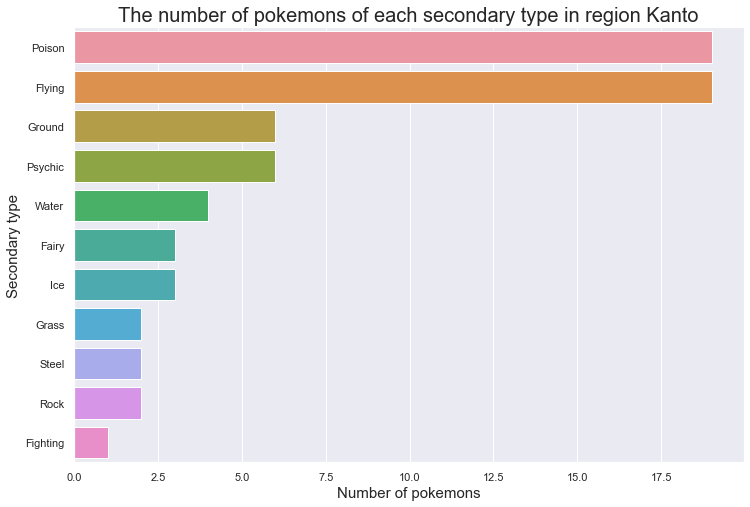

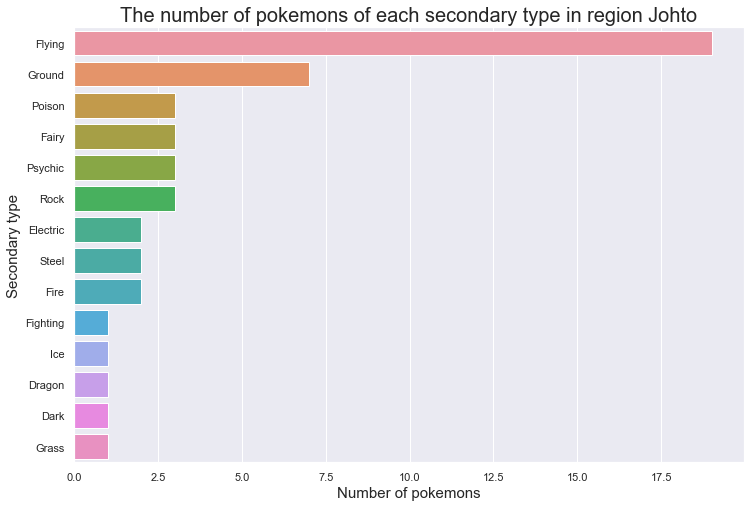

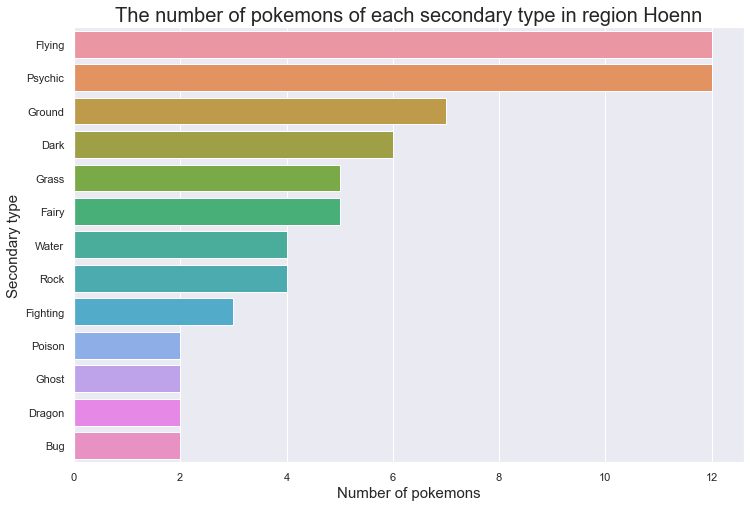

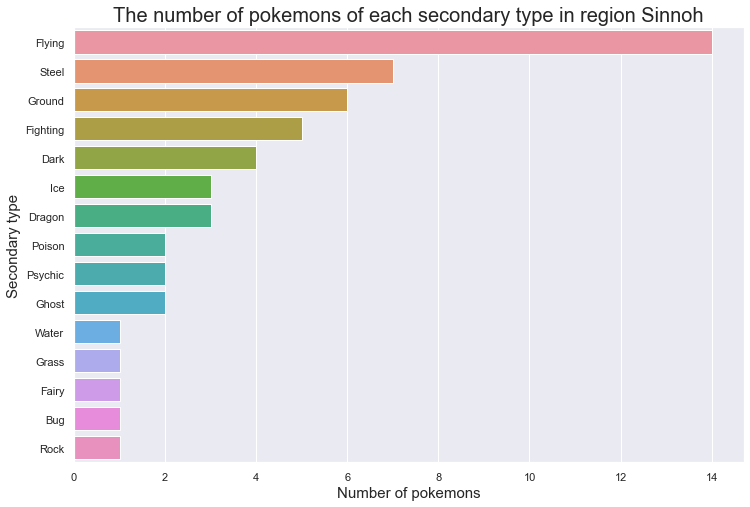

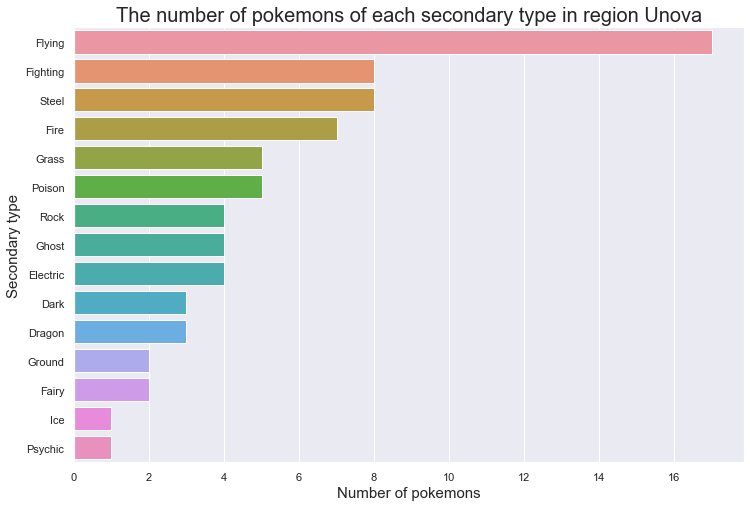

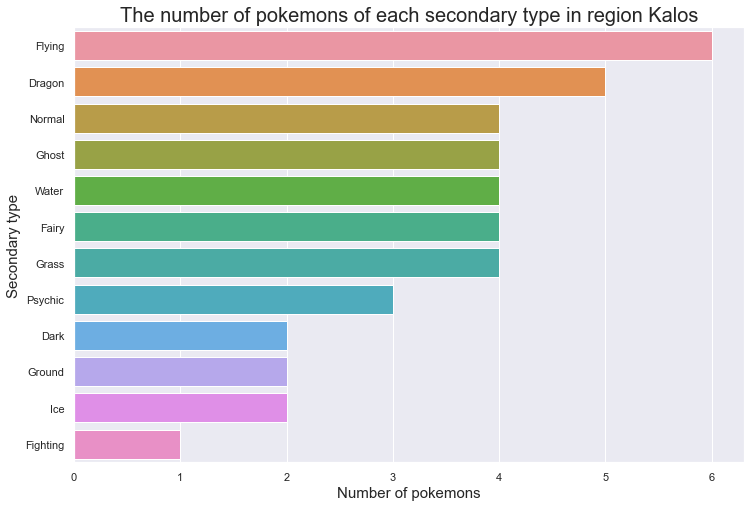

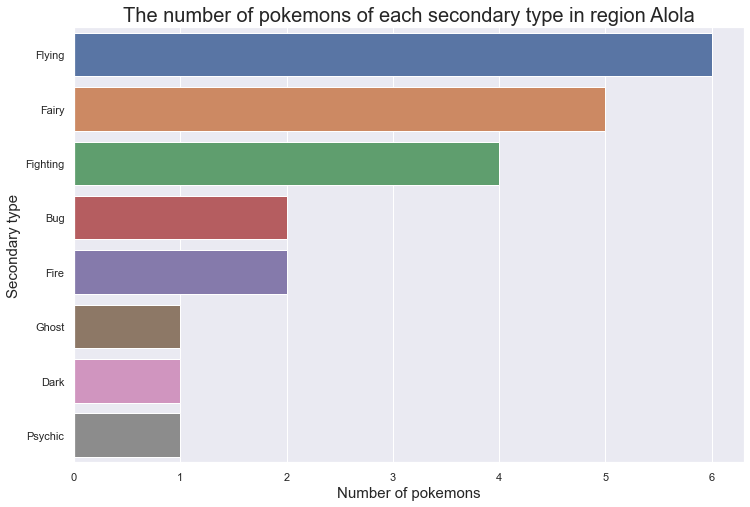

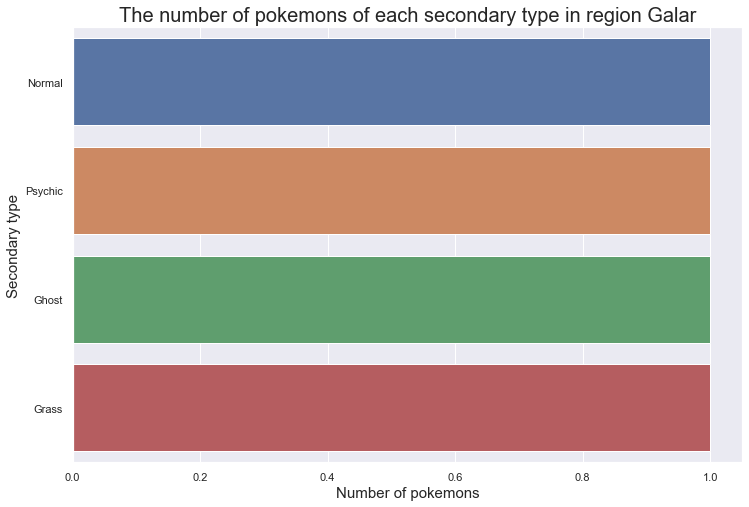

In [31]:
for region in regions_array:
    
    pokemons_counts = df_pokemon.loc[df_pokemon["region"] == region, "secondary_type"].value_counts()
    
    if len(pokemons_counts) != 0:
        
        fig, ax = plt.subplots()
        ax = sns.barplot(y = df_pokemon.loc[df_pokemon["region"] == region, "secondary_type"].value_counts().index, x = pokemons_counts)
        ax.set_xlabel("Number of pokemons", fontsize = 15)
        ax.set_ylabel("Secondary type", fontsize = 15)
        ax.set_title(f"The number of pokemons of each secondary type in region {region}", fontsize = 20)
        fig.set_size_inches((12, 8))

plt.show()

## How many pokemons of each main type are there in the regions? 

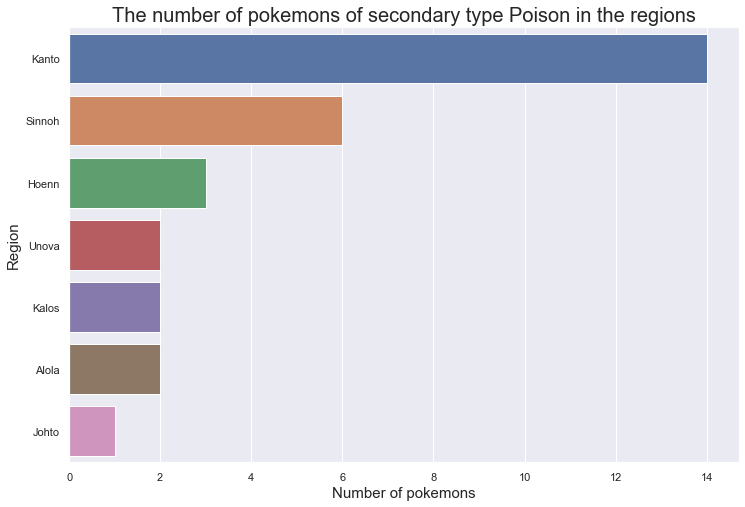

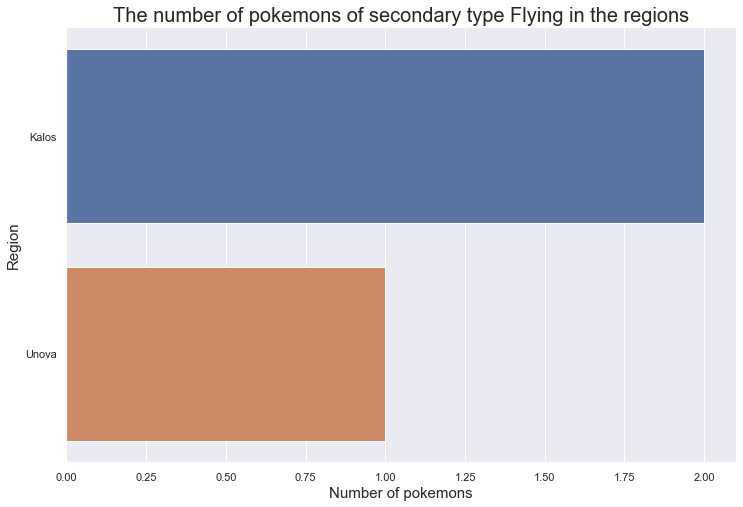

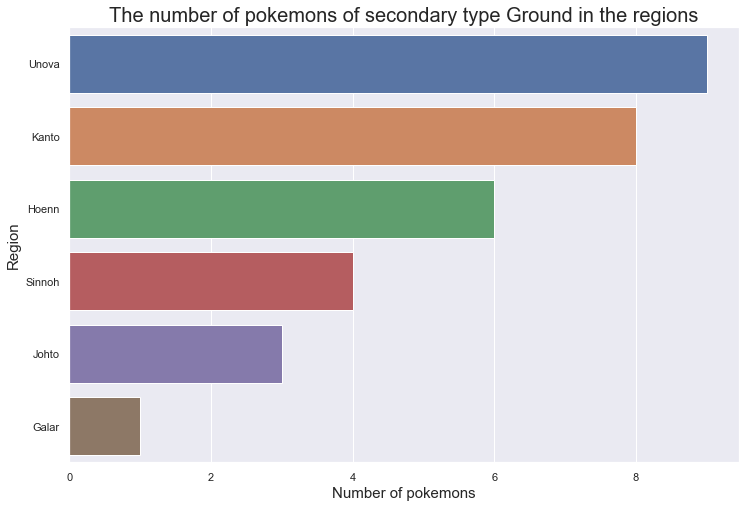

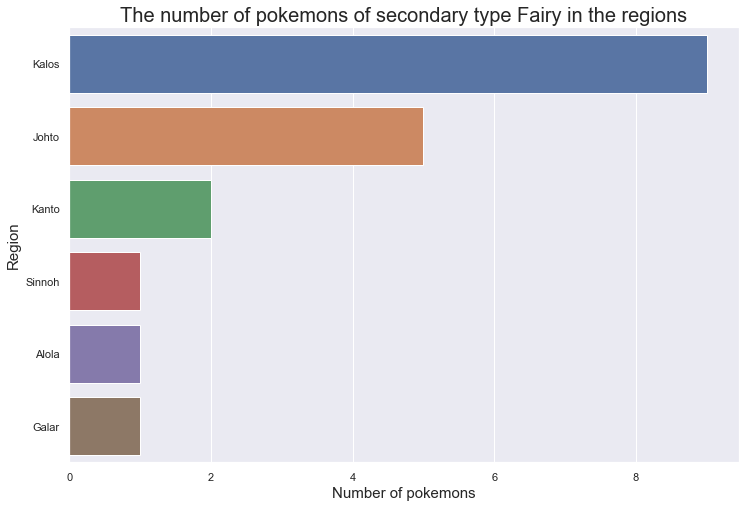

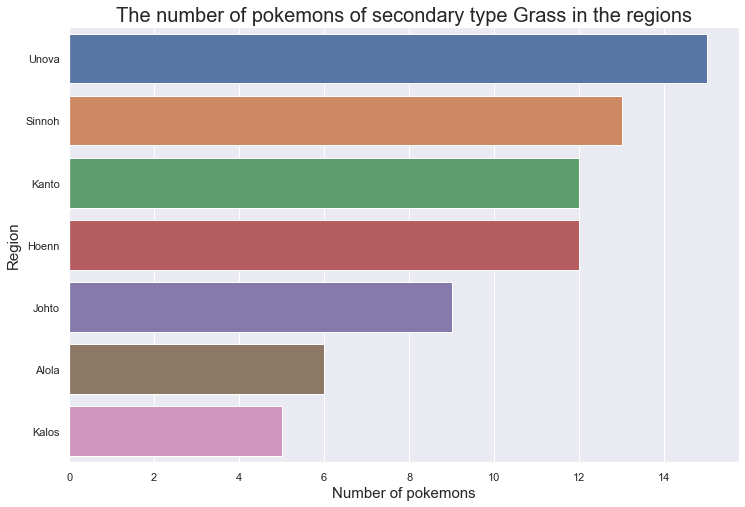

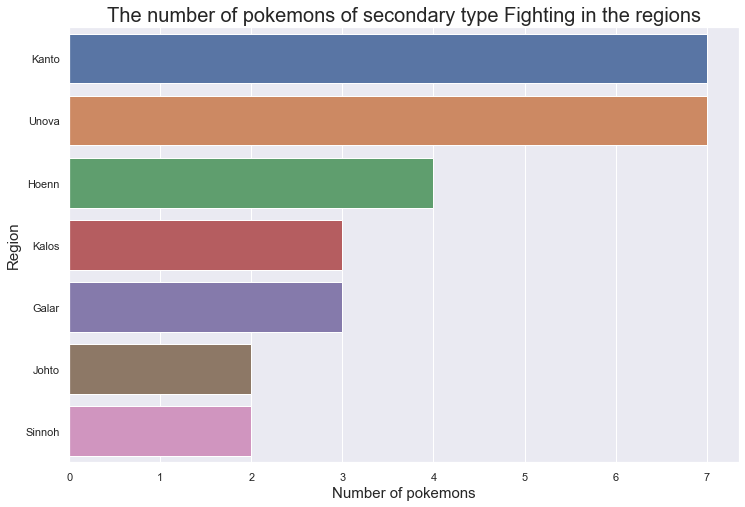

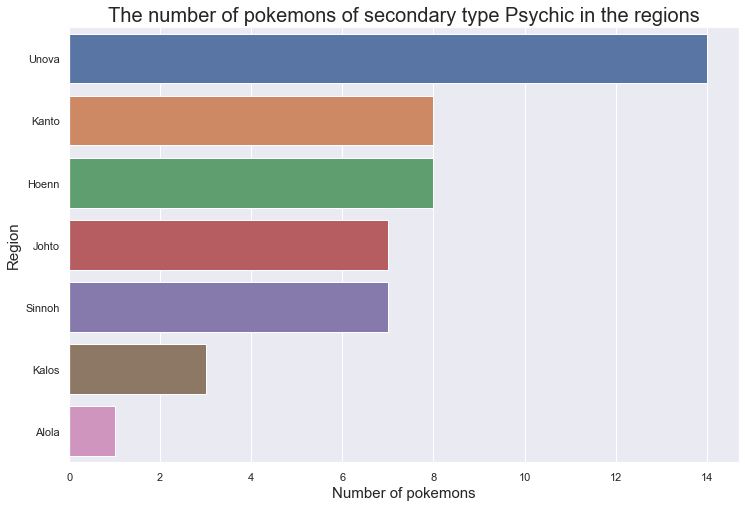

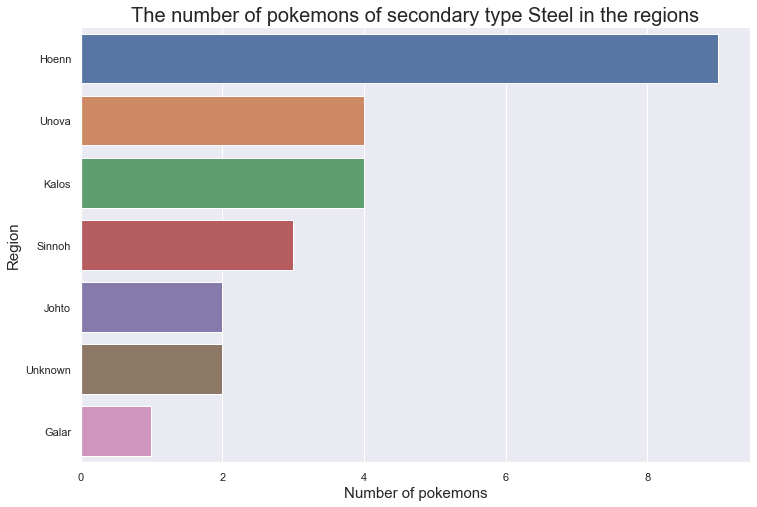

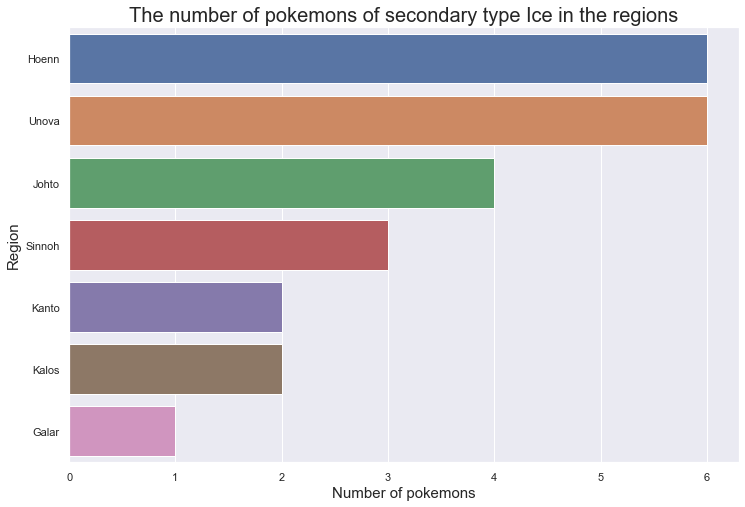

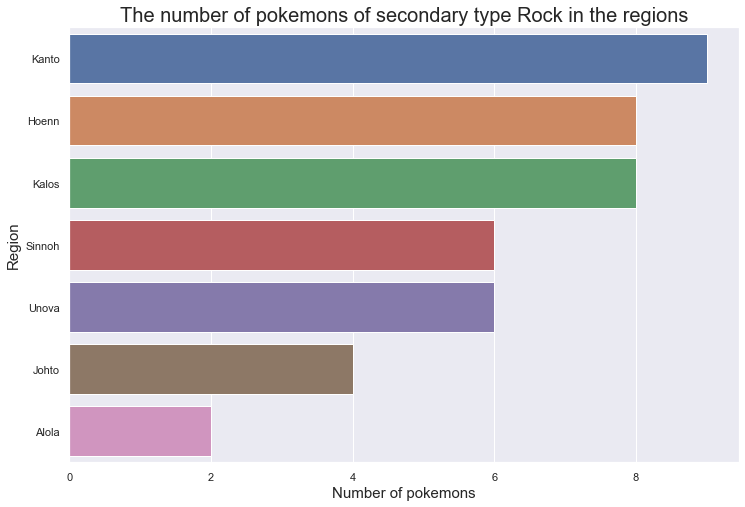

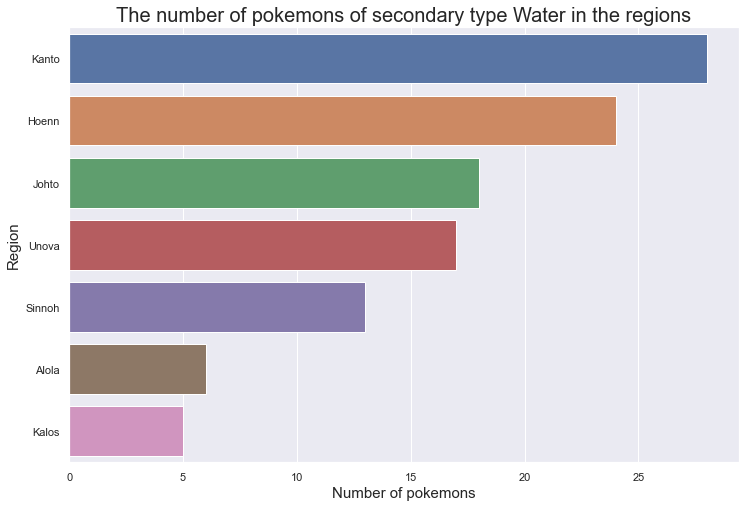

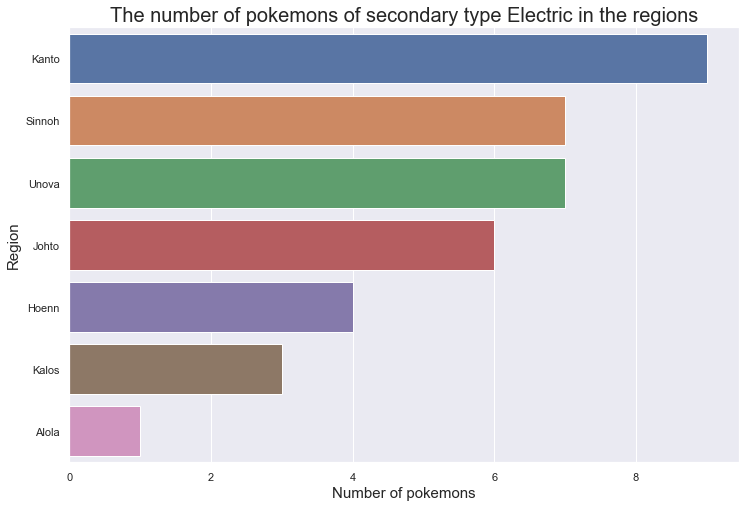

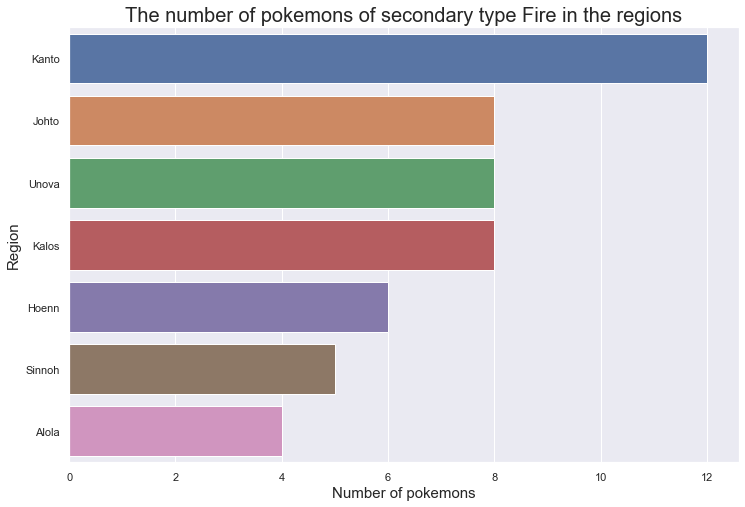

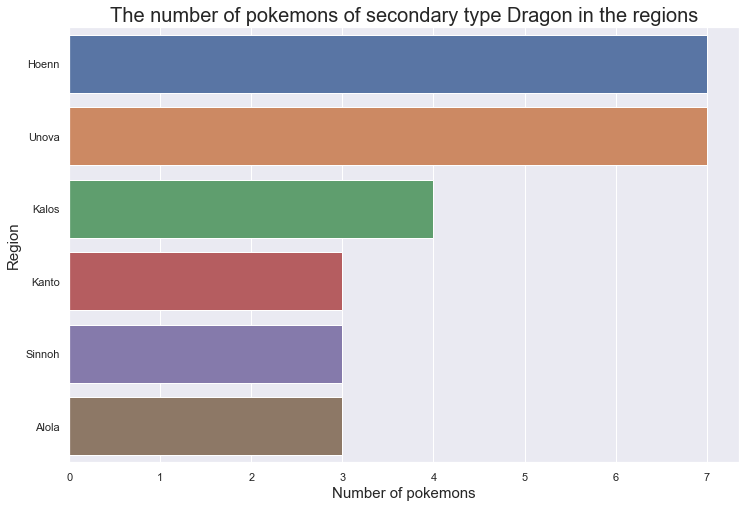

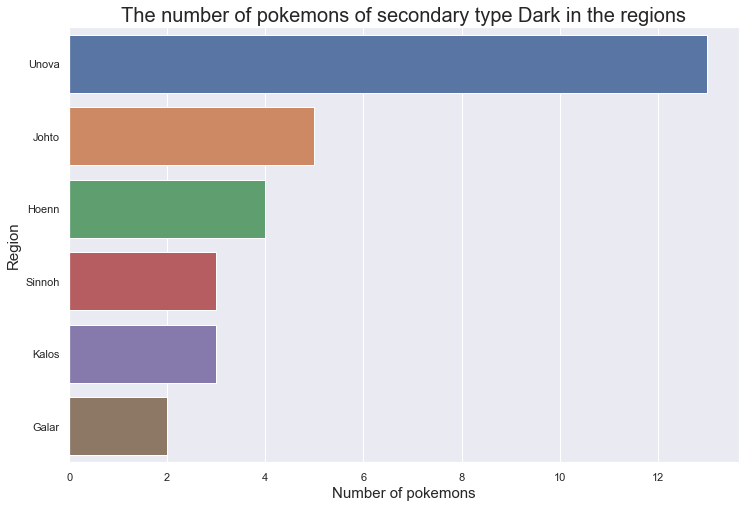

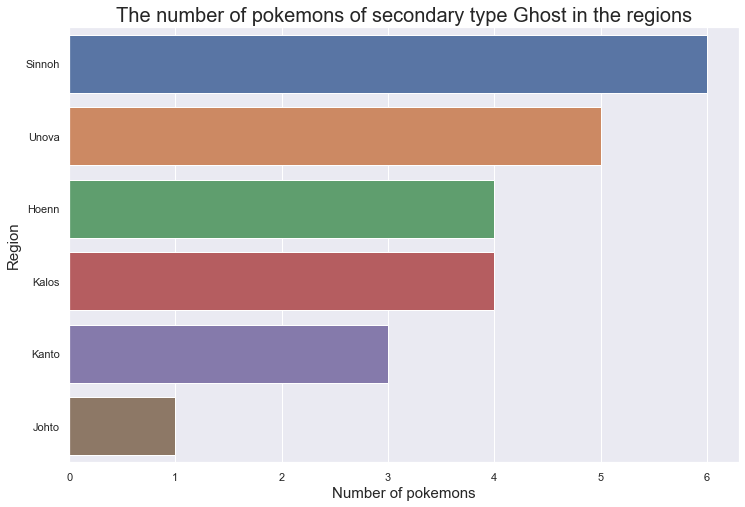

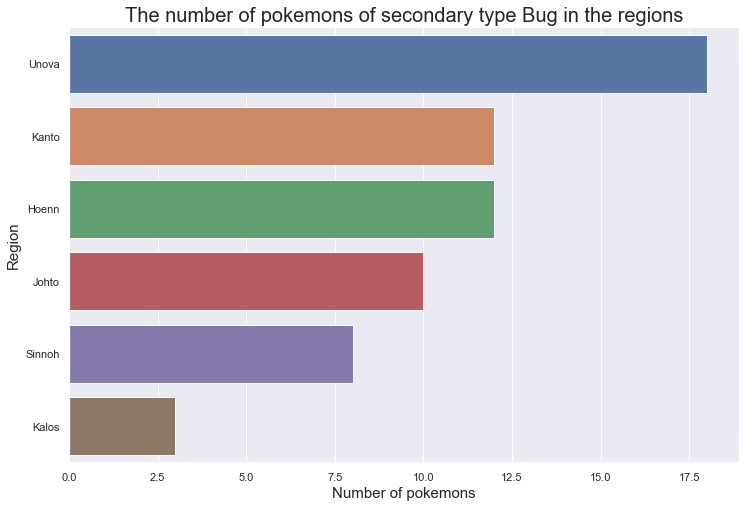

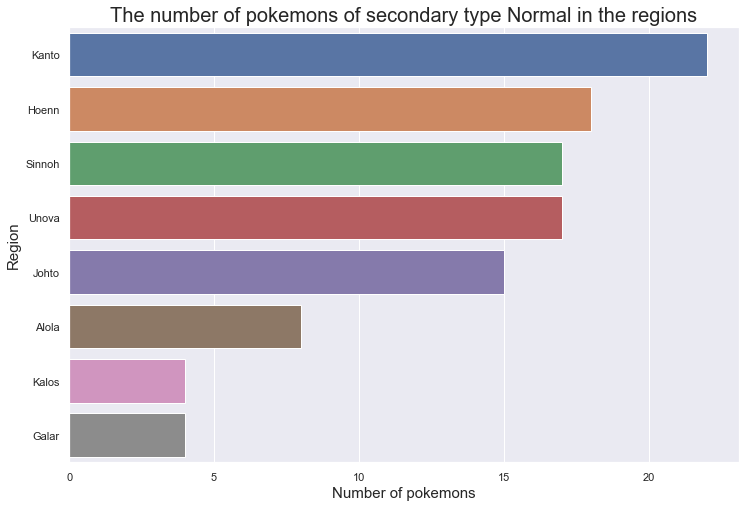

In [32]:
for secondary in pokemon_secondary_type_array:

    fig, ax = plt.subplots()
    ax = sns.barplot(y = df_pokemon.loc[df_pokemon["main_type"] == secondary, "region"].value_counts().index, x = df_pokemon.loc[df_pokemon["main_type"] == secondary, "region"].value_counts())
    ax.set_xlabel("Number of pokemons", fontsize = 15)
    ax.set_ylabel("Region", fontsize = 15)
    ax.set_title(f"The number of pokemons of secondary type {secondary} in the regions", fontsize = 20)
    fig.set_size_inches((12, 8))
    
plt.show()

## Top 10 pokemon category in each region

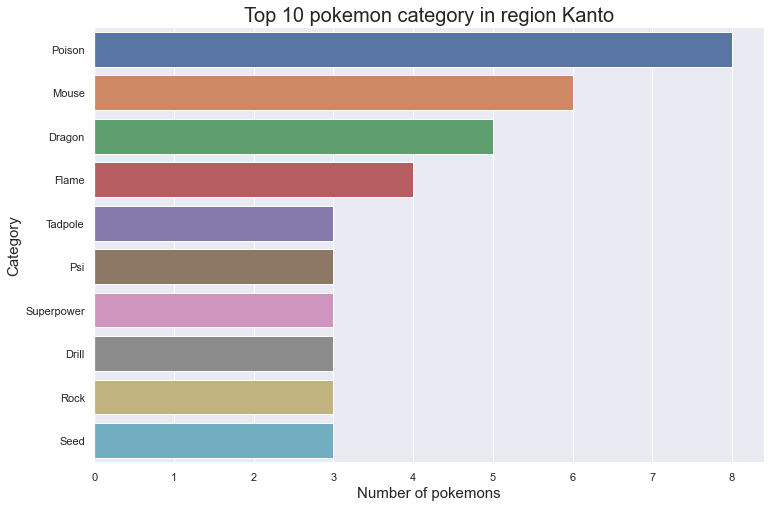

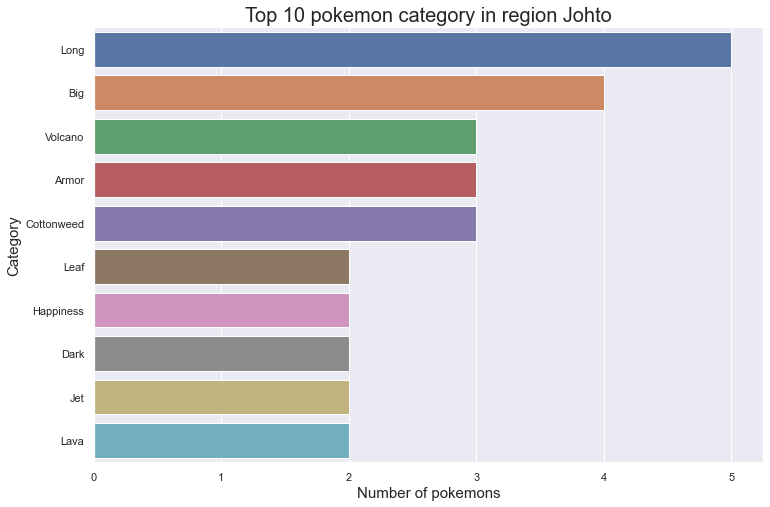

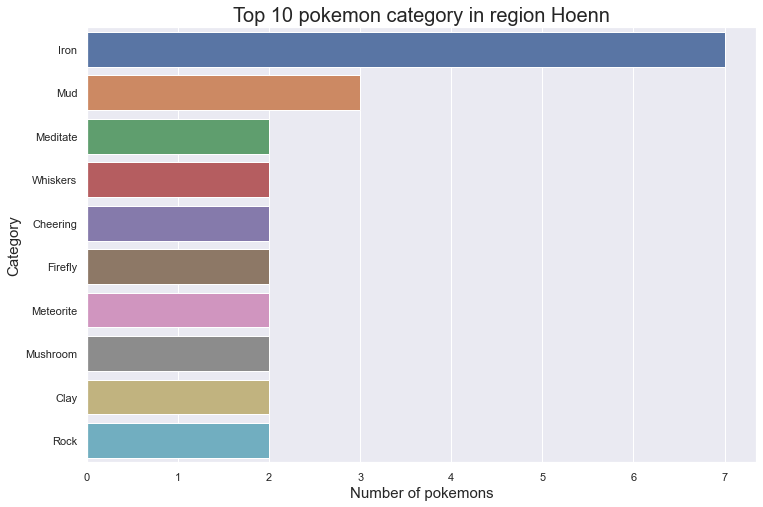

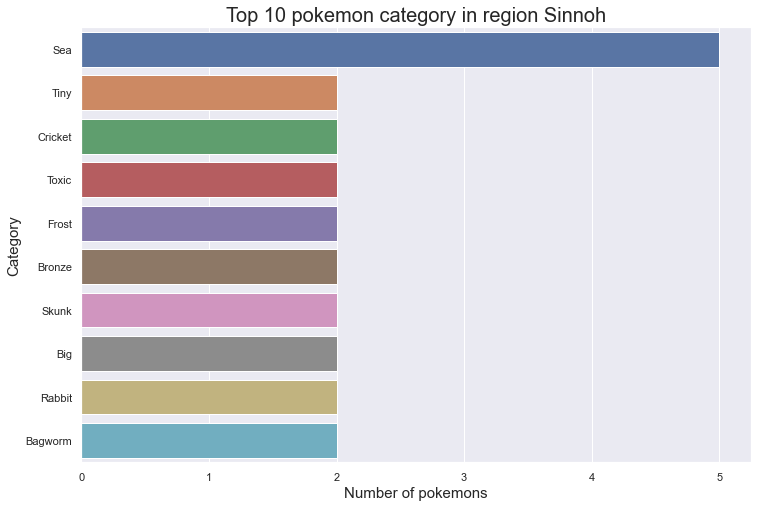

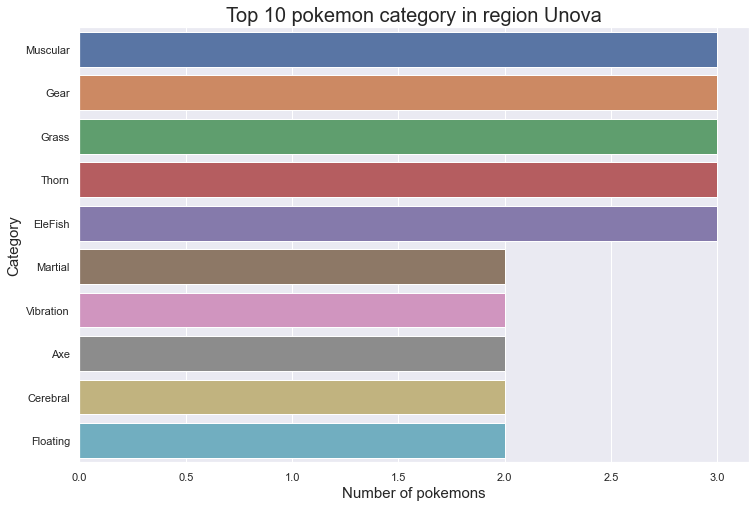

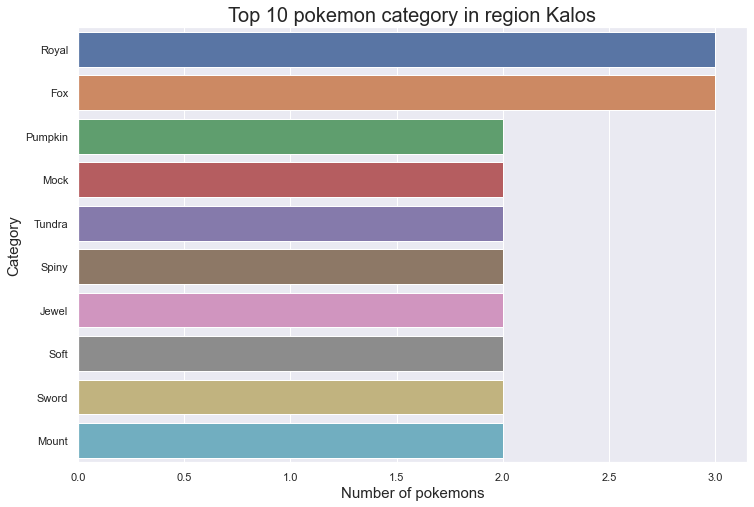

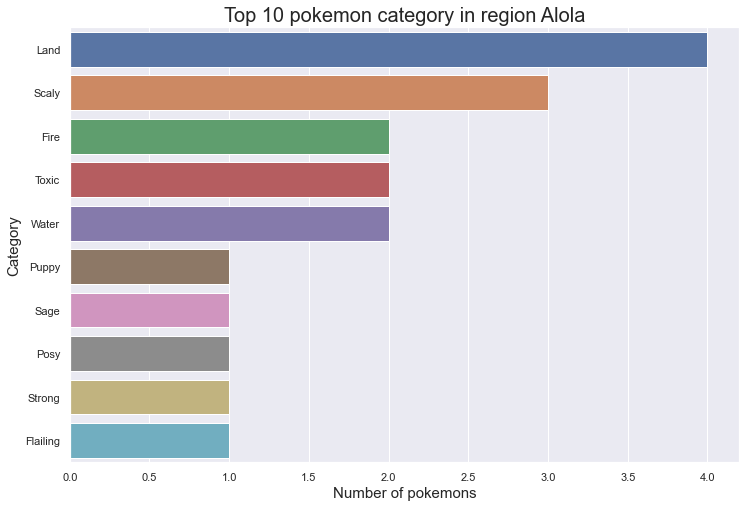

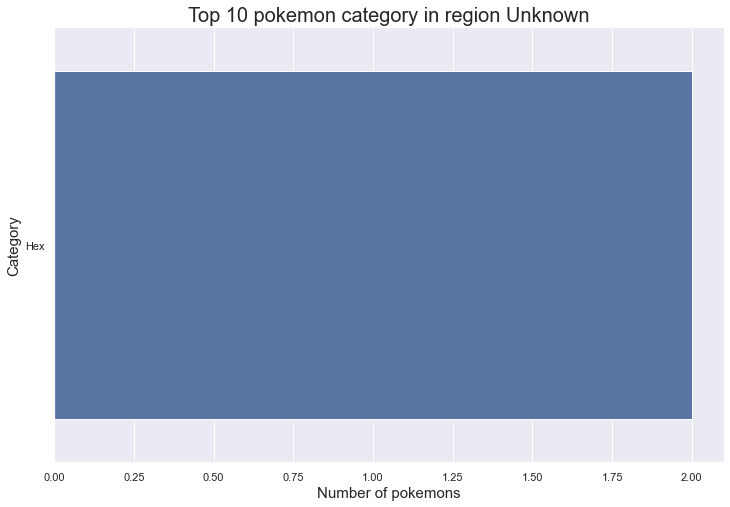

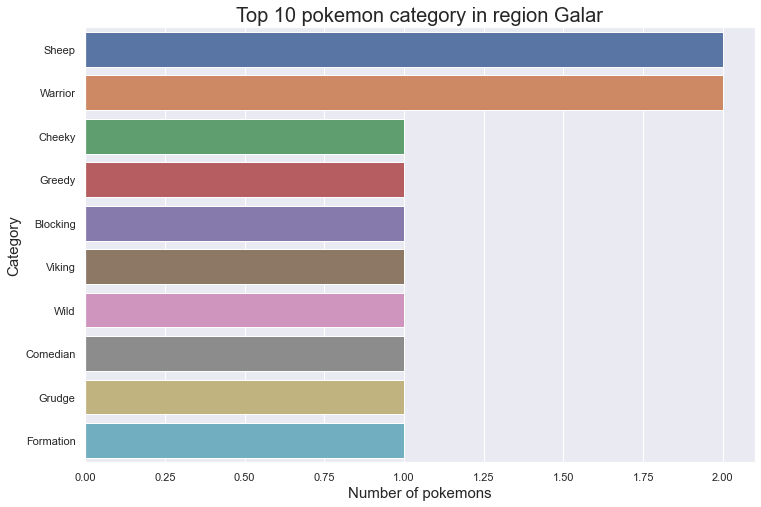

In [33]:
for region in regions_array:
    
    category_counts = df_pokemon.loc[df_pokemon["region"] == region, "category"].value_counts()
    category_counts_length = len(category_counts)
    
    if category_counts_length != 0:
        
        fig, ax = plt.subplots()
        if category_counts_length < 10:
            
            ax = sns.barplot(y = df_pokemon.loc[df_pokemon["region"] == region, "category"].value_counts().index[:category_counts_length], x = category_counts[:category_counts_length])
        else:
            
            ax = sns.barplot(y = df_pokemon.loc[df_pokemon["region"] == region, "category"].value_counts().index[:10], x = category_counts[:10])
        
        ax.set_xlabel("Number of pokemons", fontsize = 15)
        ax.set_ylabel("Category", fontsize = 15)
        ax.set_title(f"Top 10 pokemon category in region {region}", fontsize = 20)
        fig.set_size_inches((12, 8))    
        
plt.show()

## Distribution of the numerical stats of the pokemons

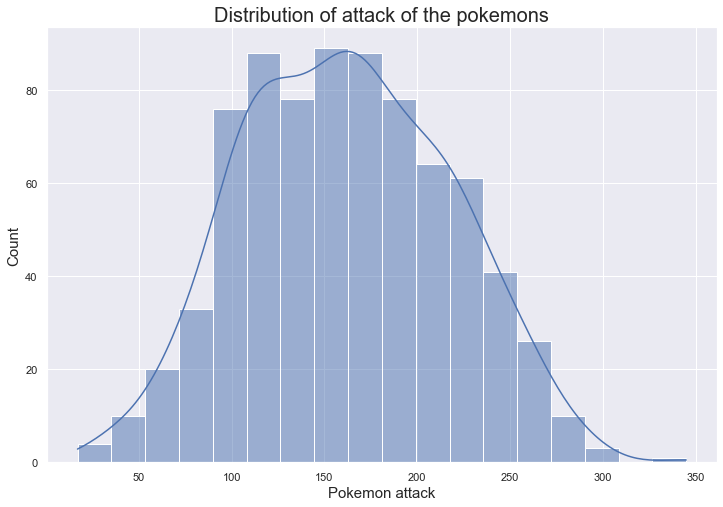

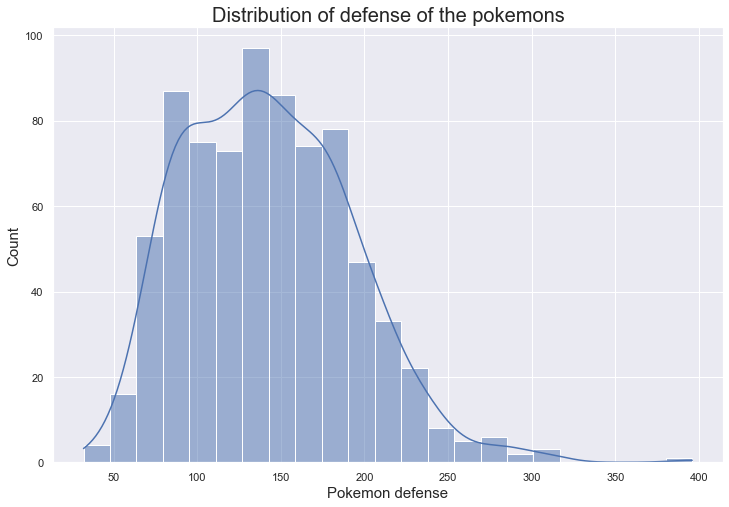

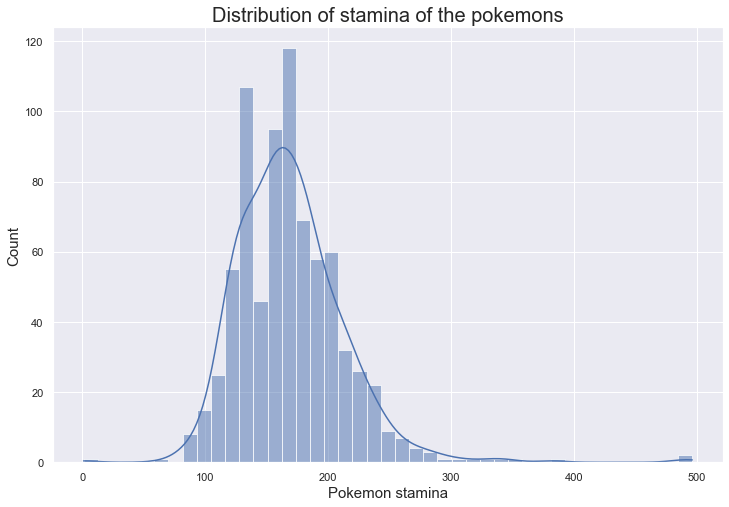

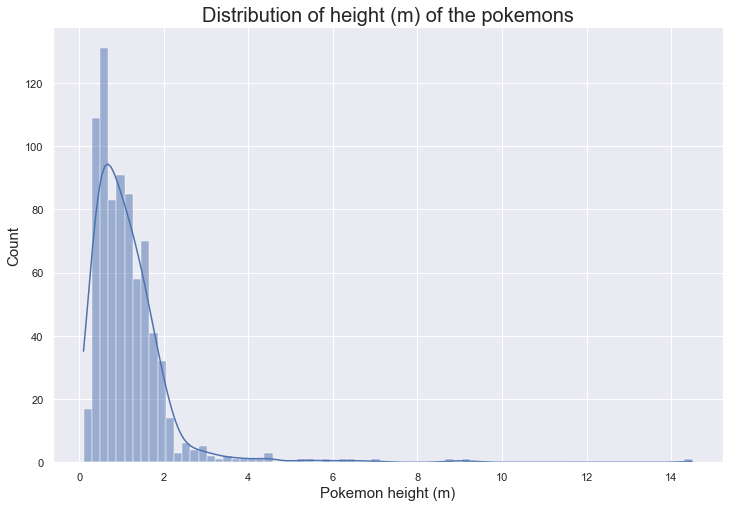

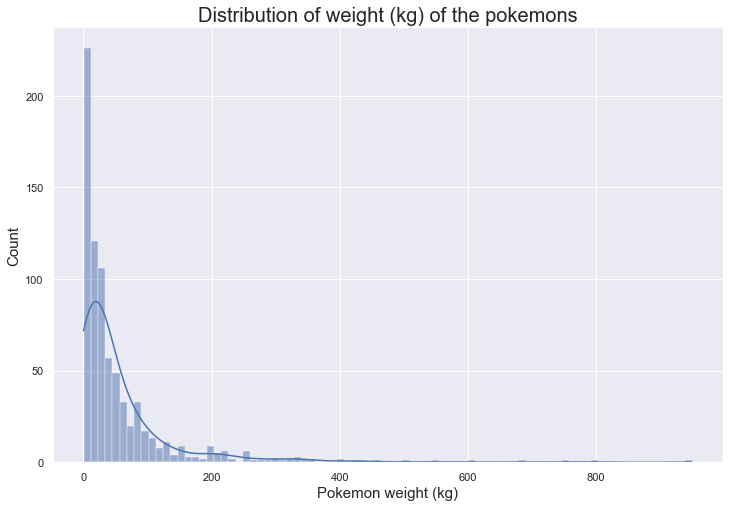

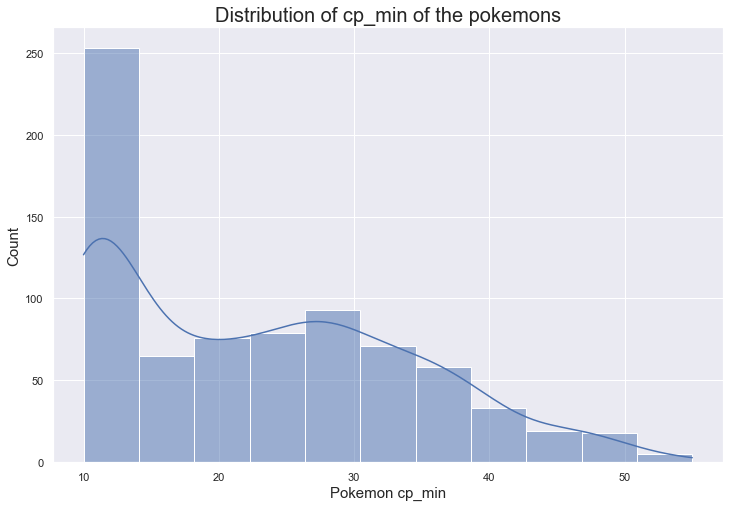

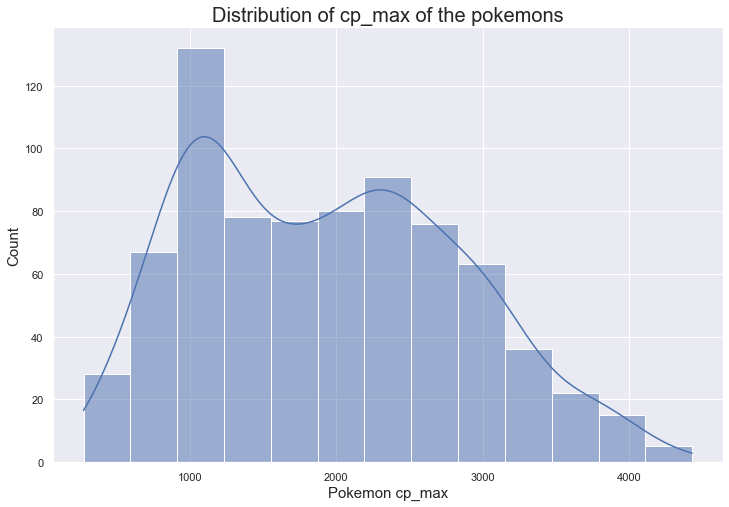

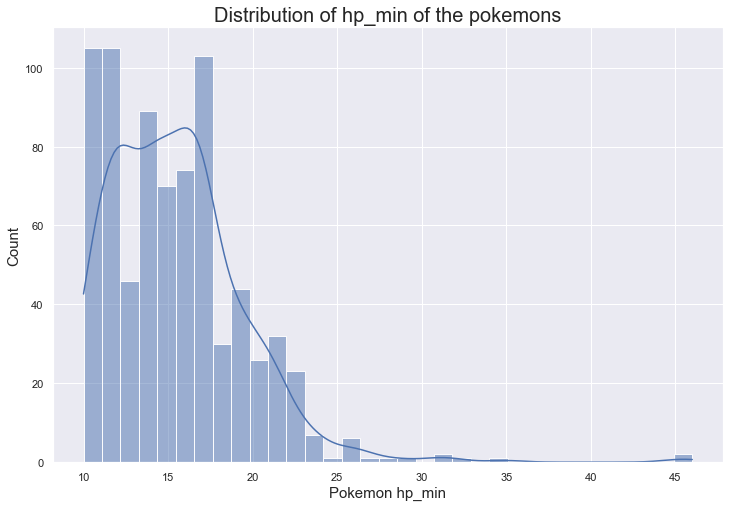

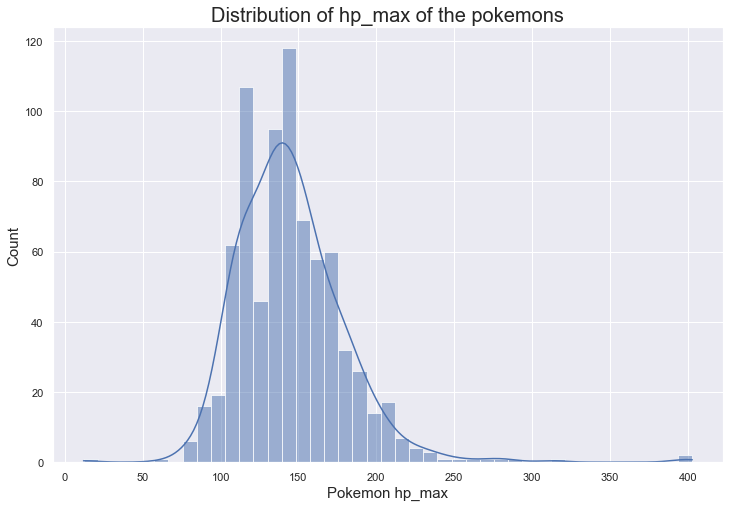

In [34]:
columns_list = ["attack", "defense", "stamina", "height (m)", "weight (kg)", "cp_min", "cp_max", "hp_min", "hp_max"]

for column in columns_list:
    
    fig, ax = plt.subplots()
    ax = sns.histplot(x = column, data = df_pokemon, kde = True)
    ax.set_xlabel("Pokemon "+column, fontsize = 15)
    ax.set_ylabel("Count", fontsize = 15)
    ax.set_title(f"Distribution of {column} of the pokemons", fontsize = 20)
    fig.set_size_inches((12, 8))
    
plt.show()

In [35]:
df_pokemon[columns_list].describe()

,attack,defense,stamina,height (m),weight (kg),cp_min,cp_max,hp_min,hp_max
count,770.00,770.00,770.00,770.00,770.00,770.00,770.00,770.00,770.00
mean,161.86,142.59,169.06,1.14,57.01,23.00,1940.12,15.49,144.99
std,55.82,50.17,44.21,1.01,93.65,11.12,905.28,4.05,34.88
min,17.00,32.00,1.00,0.10,0.10,10.00,274.00,10.00,12.00
25%,118.00,102.25,137.00,0.60,9.00,12.00,1146.50,12.00,120.00
50%,161.00,139.00,163.00,0.99,28.00,22.00,1891.00,15.00,140.00
75%,204.00,176.00,190.00,1.50,60.95,31.00,2618.75,17.00,162.00
max,345.00,396.00,496.00,14.50,950.00,55.00,4431.00,46.00,403.00


### Distribution of the numerical stats of the pokemons that have Grass as main type

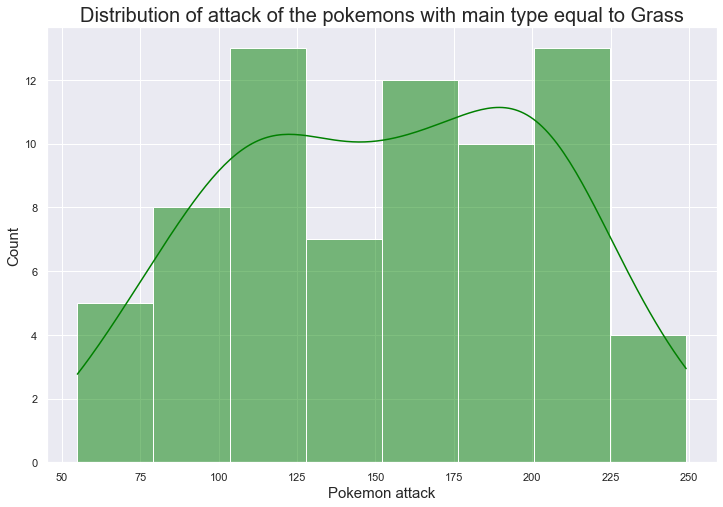

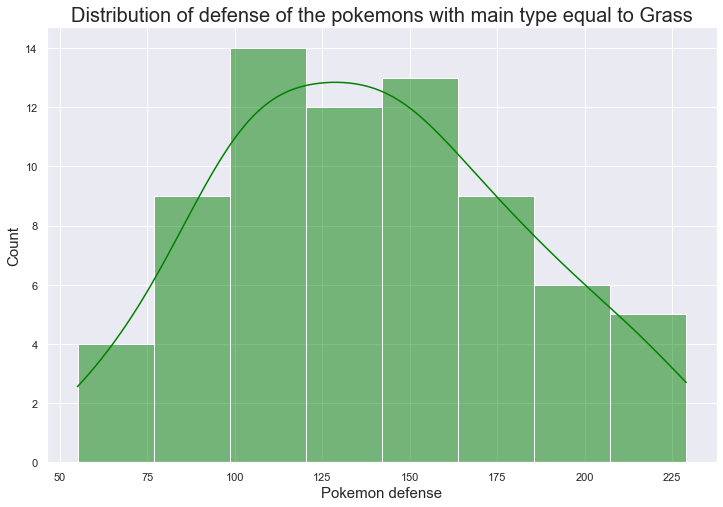

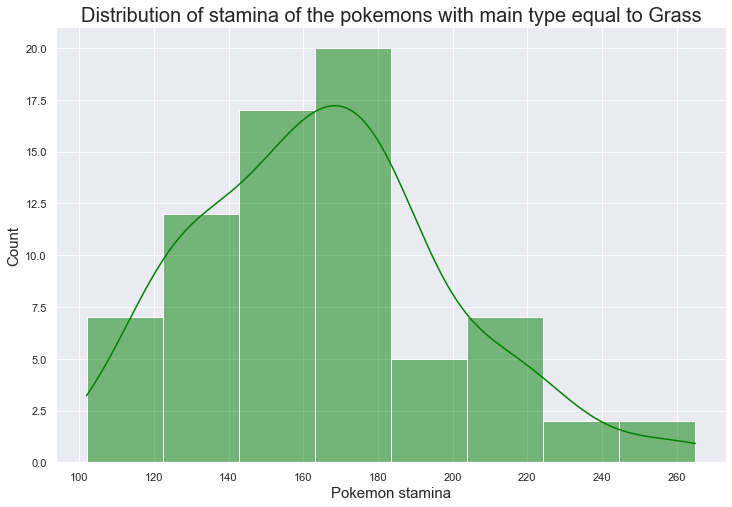

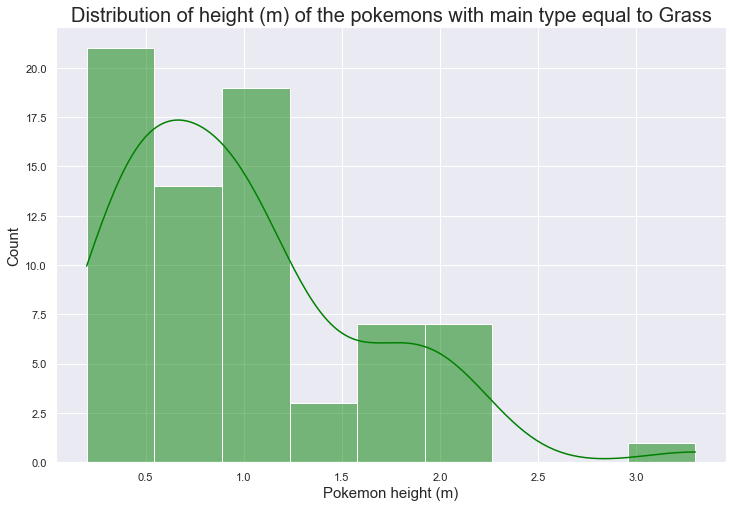

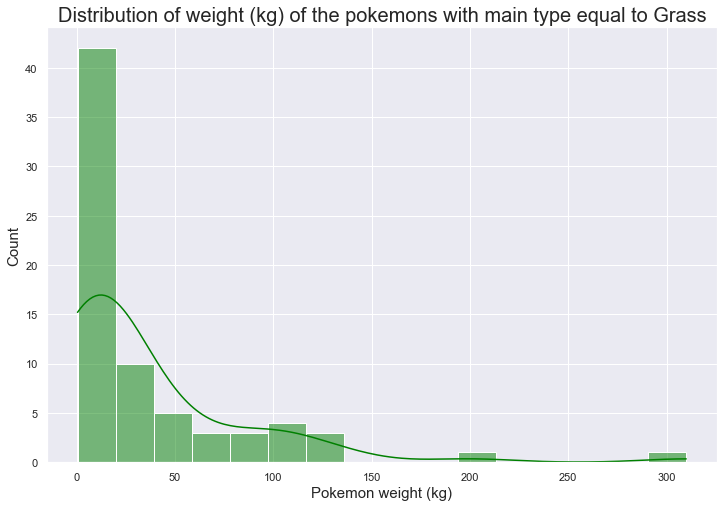

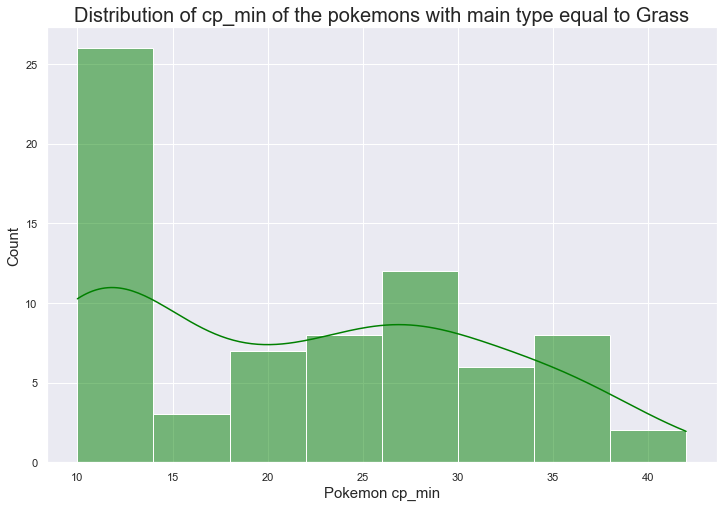

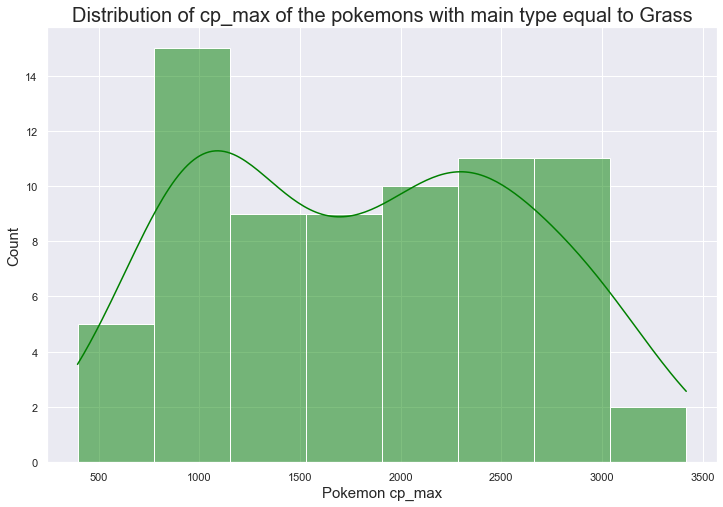

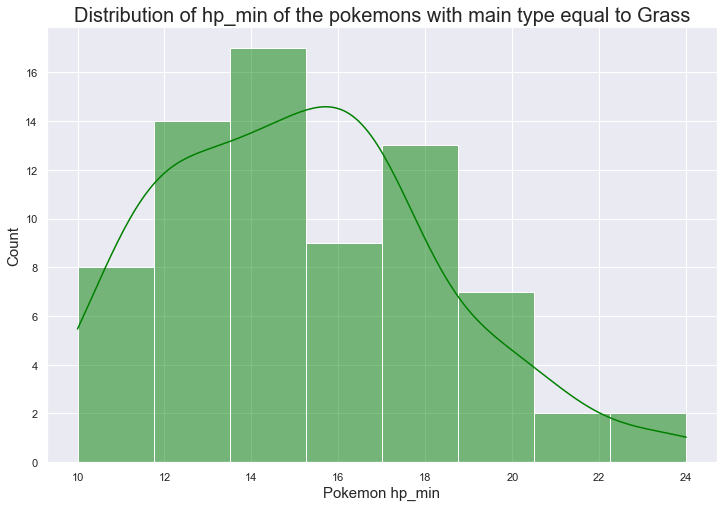

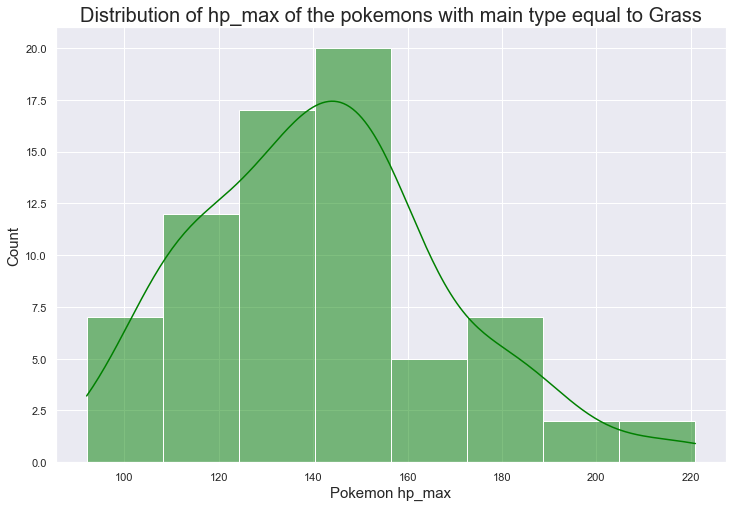

In [36]:
input_main_type = "Grass"

columns_list = ["attack", "defense", "stamina", "height (m)", "weight (kg)", "cp_min", "cp_max", "hp_min", "hp_max"]

for column in columns_list:
    
    fig, ax = plt.subplots()
    ax = sns.histplot(x = column, data = df_pokemon[df_pokemon["main_type"] == input_main_type], kde = True, color = "green")
    ax.set_xlabel("Pokemon "+column, fontsize = 15)
    ax.set_ylabel("Count", fontsize = 15)
    ax.set_title(f"Distribution of {column} of the pokemons with main type equal to {input_main_type}", fontsize = 20)
    fig.set_size_inches((12, 8))
    
plt.show()

### Distribution of the numerical stats of the pokemons of the region Kanto

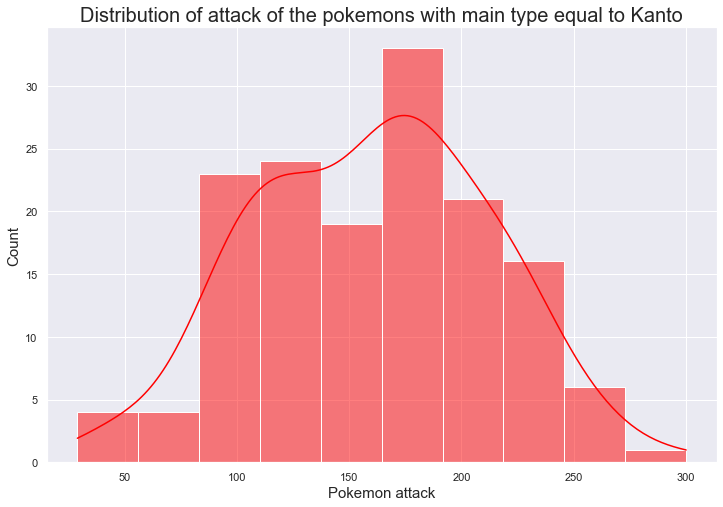

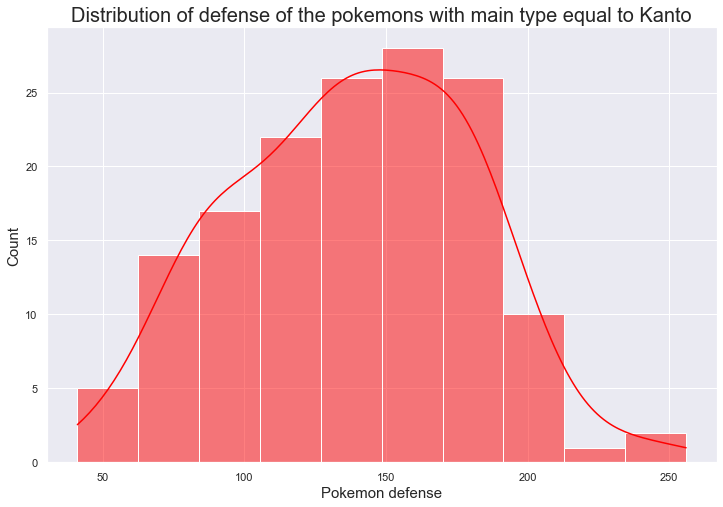

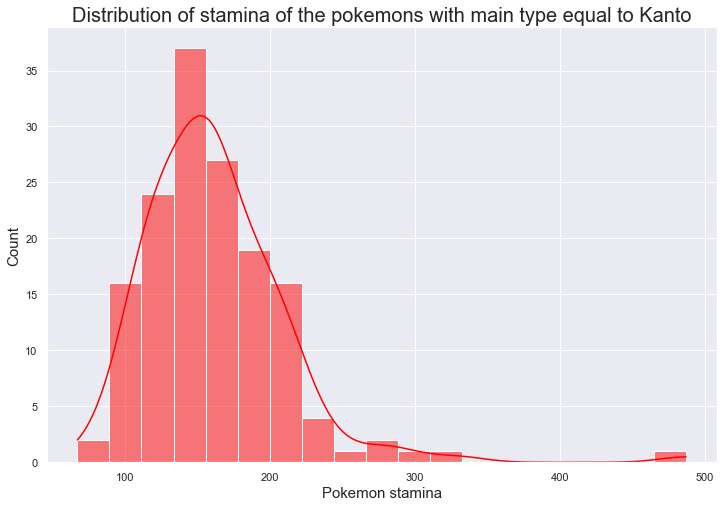

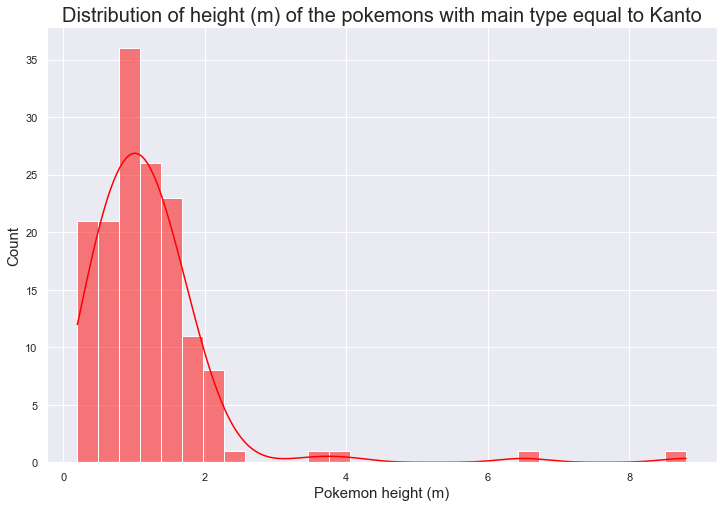

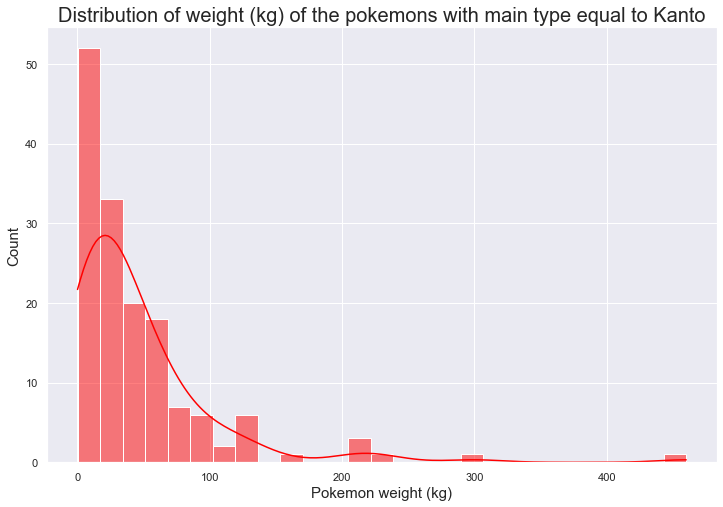

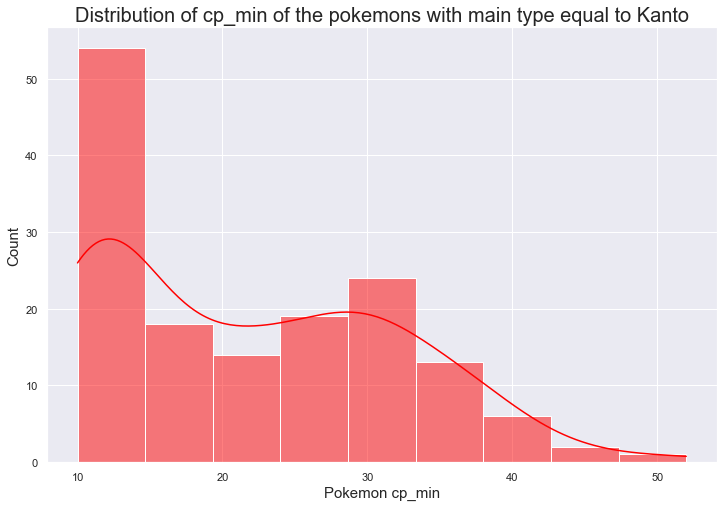

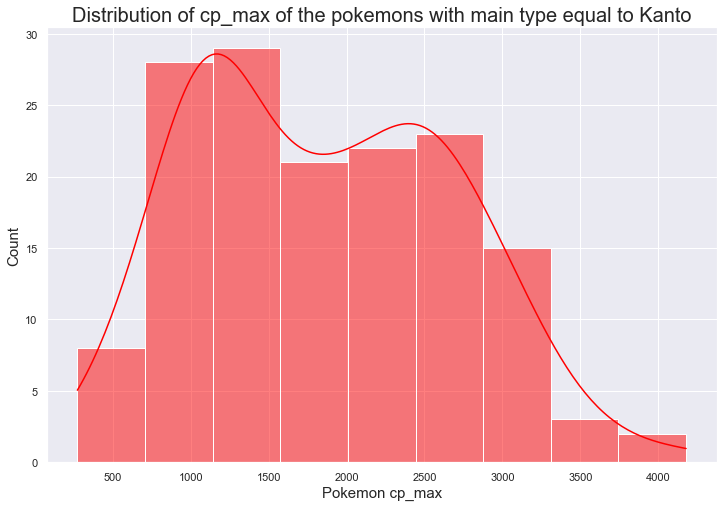

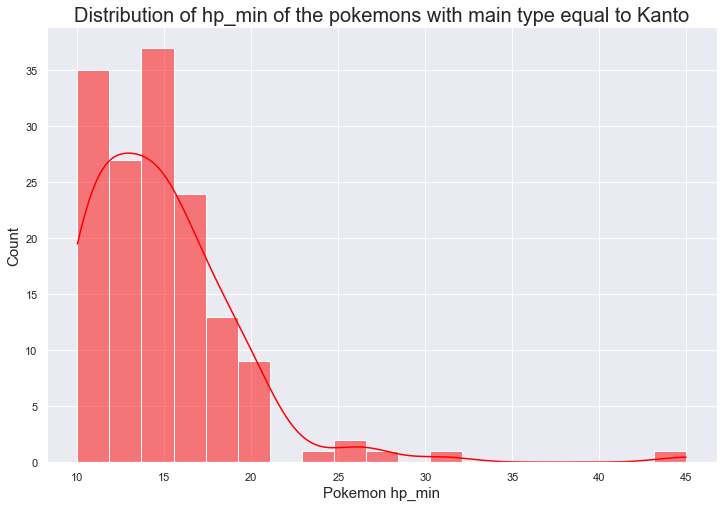

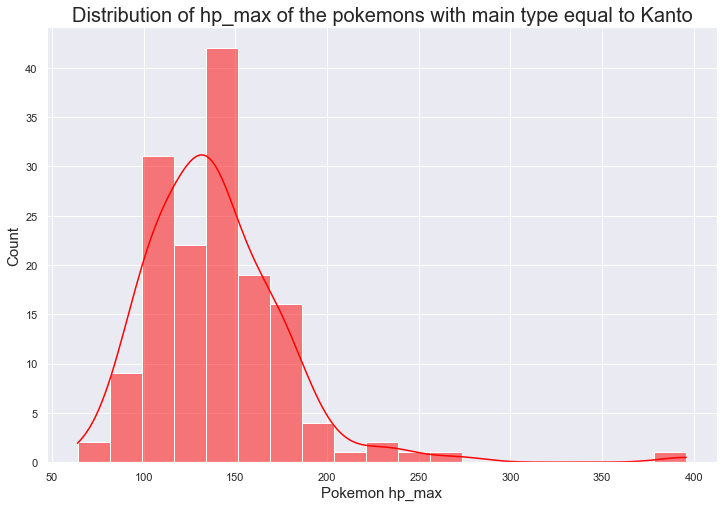

In [37]:
input_region = "Kanto"

columns_list = ["attack", "defense", "stamina", "height (m)", "weight (kg)", "cp_min", "cp_max", "hp_min", "hp_max"]

for column in columns_list:
    
    fig, ax = plt.subplots()
    ax = sns.histplot(x = column, data = df_pokemon[df_pokemon["region"] == input_region], kde = True, color = "red")
    ax.set_xlabel("Pokemon "+column, fontsize = 15)
    ax.set_ylabel("Count", fontsize = 15)
    ax.set_title(f"Distribution of {column} of the pokemons with main type equal to {input_region}", fontsize = 20)
    fig.set_size_inches((12, 8))
    
plt.show()

## Correlation matrix of the numerical stats of the pokemons

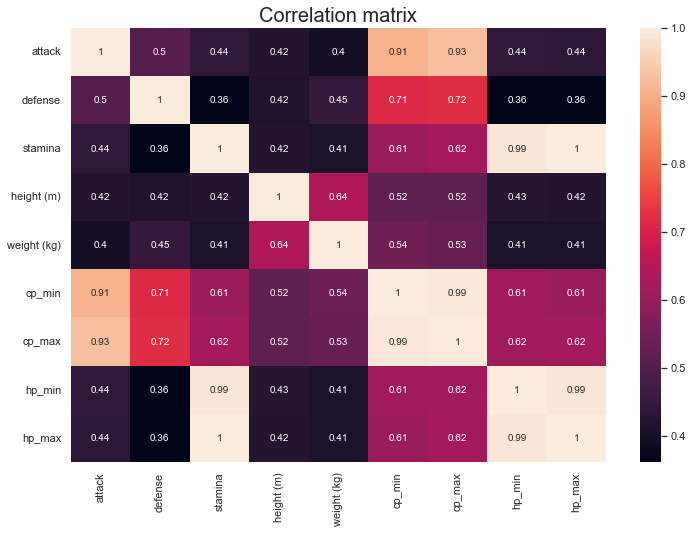

In [38]:
fig, ax = plt.subplots()

ax = sns.heatmap(df_pokemon[columns_list].corr(), annot = True)
ax.set_title("Correlation matrix", fontsize = 20)
fig.set_size_inches((12, 8))

## Scatter plots of some numerical stats of the pokemons

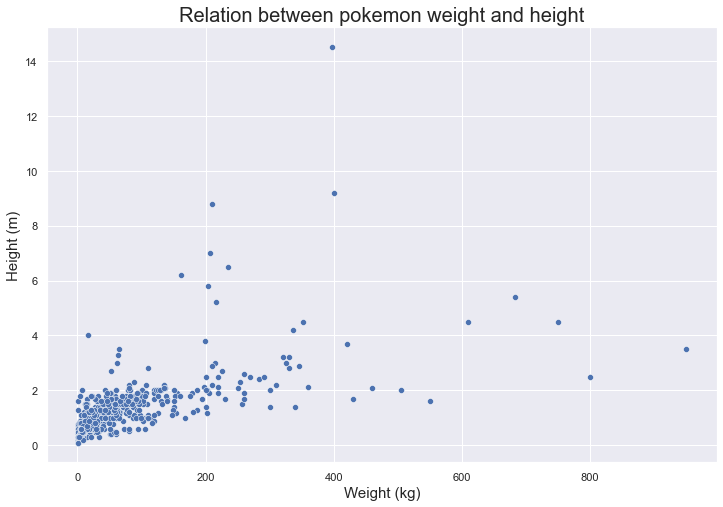

In [39]:
fig, ax = plt.subplots()

ax = sns.scatterplot(x = "weight (kg)", y = "height (m)", data = df_pokemon)
ax.set_title("Relation between pokemon weight and height", fontsize = 20)
ax.set_xlabel("Weight (kg)", fontsize = 15)
ax.set_ylabel("Height (m)", fontsize = 15)
fig.set_size_inches((12, 8))
plt.show()

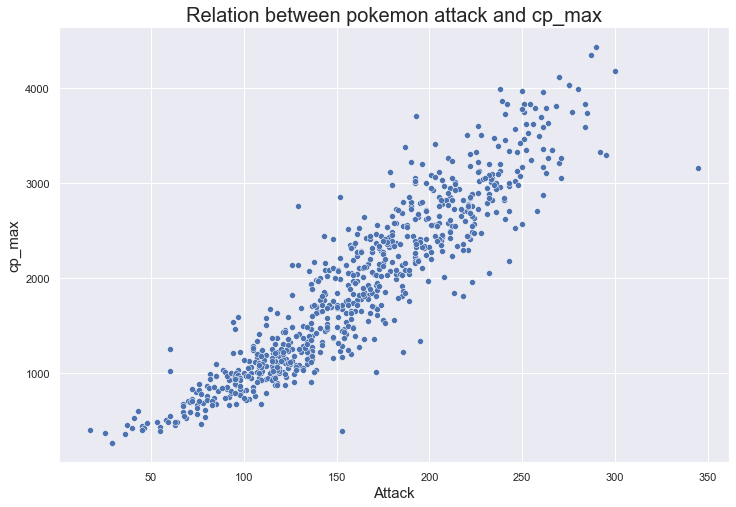

In [40]:
fig, ax = plt.subplots()

ax = sns.scatterplot(x = "attack", y = "cp_max", data = df_pokemon)
ax.set_title("Relation between pokemon attack and cp_max", fontsize = 20)
ax.set_xlabel("Attack", fontsize = 15)
ax.set_ylabel("cp_max", fontsize = 15)
fig.set_size_inches((12, 8))
plt.show()

## Top 5 pokemons according to some numerical stat

In [41]:
df_pokemon.nsmallest(5, "defense")

,number,pokemon_name,pic_url,main_type,secondary_type,region,category,height (m),weight (kg),pokemon_family,...,raid_avail,research_avail,shiny,shadow,pkedex_desc,poss_attacks,hp_min,hp_max,cp_min,cp_max
173,174,Igglybuff,https://static.wikia.nocookie.net/pokemongo/im...,Normal,Fairy,Johto,Balloon,0.30,1.0,Jigglypuff family,...,No,No,Yes,No,Igglybuff's vocal cords are not sufficiently d...,"['Feint Attack', 'Pound', 'Psychic', 'Shadow B...",19,175,10,535
317,318,Carvanha,https://static.wikia.nocookie.net/pokemongo/im...,Water,Dark,Hoenn,Savage,0.79,20.8,Carvanha family,...,Formerly (1st tier level),Yes,Yes,Yes,Carvanha's strongly developed jaws and its sha...,"['Bite', 'Snarl', 'Aqua Jet', 'Crunch', 'Poiso...",12,113,10,1020
38,39,Jigglypuff,https://static.wikia.nocookie.net/pokemongo/im...,Normal,Fairy,Kanto,Balloon,0.50,5.5,Jigglypuff family,...,Formerly (1st tier level),Yes,Yes,No,Jigglypuff's vocal cords can freely adjust the...,"['Feint Attack', 'Pound', 'Dazzling Gleam', 'D...",23,210,10,724
292,293,Whismur,https://static.wikia.nocookie.net/pokemongo/im...,Normal,NaN,Hoenn,Whisper,0.61,16.3,Whismur family,...,No,Formerly,Yes,Yes,"Normally, Whismur's voice is very quiet—it is ...","['Astonish', 'Pound', 'Disarming Voice', 'Flam...",15,139,10,671
12,13,Weedle,https://static.wikia.nocookie.net/pokemongo/im...,Bug,Poison,Kanto,Hairy,0.30,3.2,Weedle family,...,Formerly (1st tier level),Formerly,Yes,Yes,Weedle has an extremely acute sense of smell. ...,"['Bug Bite', 'Poison Sting', 'Struggle']",11,106,10,456


In [42]:
urllib.request.urlretrieve(df_pokemon.nsmallest(5, "defense")["pic_url"][df_pokemon.nsmallest(5, "defense").index[0]], df_pokemon.nsmallest(5, "defense")["pic_url"][df_pokemon.nsmallest(5, "defense").index[0]].split("/")[-1])
img = Image.open(df_pokemon.nsmallest(5, "defense")["pic_url"][df_pokemon.nsmallest(5, "defense").index[0]].split("/")[-1])
img.show()

Pokemon with the smallest defense

![pokemon](https://static.wikia.nocookie.net/pokemongo/images/5/5b/Igglybuff.png)

In [43]:
df_pokemon[df_pokemon["main_type"] == "Grass"].nlargest(5, "attack")

,number,pokemon_name,pic_url,main_type,secondary_type,region,category,height (m),weight (kg),pokemon_family,...,raid_avail,research_avail,shiny,shadow,pkedex_desc,poss_attacks,hp_min,hp_max,cp_min,cp_max
753,787,Tapu Bulu,https://static.wikia.nocookie.net/pokemongo/im...,Grass,Fairy,Alola,Land,1.90,45.5,Tapu Bulu family,...,Yes (5th tier level),No,No,No,It makes ringing sounds with its tail to let o...,"['Bullet Seed', 'Rock Smash', 'Dazzling Gleam'...",16,147,42,3419
406,407,Roserade,https://static.wikia.nocookie.net/pokemongo/im...,Grass,Poison,Sinnoh,Bouquet,0.90,14.5,Roselia family,...,Formerly (3rd tier level),No,Yes,No,"With the movements of a dancer, it strikes wit...","['Poison Jab', 'Razor Leaf', 'Bullet Seed', 'D...",14,134,36,2971
285,286,Breloom,https://static.wikia.nocookie.net/pokemongo/im...,Grass,Fighting,Hoenn,Mushroom,1.19,39.2,Shroomish family,...,Formerly (3rd tier level),No,No,No,Breloom closes in on its foe with light and sp...,"['Bullet Seed', 'Counter', 'Dynamic Punch', 'S...",14,134,31,2628
102,103,Exeggutor,https://static.wikia.nocookie.net/pokemongo/im...,Grass,Psychic,Kanto,Coconut,2.00,120.0,Exeggcute family,...,Formerly (3rd tier level),Formerly,Yes,Yes,Standard Pokédex description\nExeggutor origin...,"['Bullet Seed', 'Confusion', 'Extrasensory', '...",20,182,36,3014
253,254,Sceptile,https://static.wikia.nocookie.net/pokemongo/im...,Grass,NaN,Hoenn,Forest,1.70,52.2,Treecko family,...,No,No,Yes,No,Standard Pokédex description\nThe leaves growi...,"['Bullet Seed', 'Fury Cutter', 'Aerial Ace', '...",16,147,33,2757


In [44]:
urllib.request.urlretrieve(df_pokemon[df_pokemon["main_type"] == "Grass"].nlargest(5, "attack")["pic_url"][df_pokemon[df_pokemon["main_type"] == "Grass"].nlargest(5, "attack").index[0]], df_pokemon[df_pokemon["main_type"] == "Grass"].nlargest(5, "attack")["pic_url"][df_pokemon[df_pokemon["main_type"] == "Grass"].nlargest(5, "attack").index[0]].split("/")[-1])
img = Image.open(df_pokemon[df_pokemon["main_type"] == "Grass"].nlargest(5, "attack")["pic_url"][df_pokemon[df_pokemon["main_type"] == "Grass"].nlargest(5, "attack").index[0]].split("/")[-1])
img.show()

Pokemon of the main type Grass with the largest attack

![pokemon](https://static.wikia.nocookie.net/pokemongo/images/0/02/Tapu_Bulu.png)

In [45]:
df_pokemon[df_pokemon["region"] == "Hoenn"].nlargest(5, "weight (kg)")

,number,pokemon_name,pic_url,main_type,secondary_type,region,category,height (m),weight (kg),pokemon_family,...,raid_avail,research_avail,shiny,shadow,pkedex_desc,poss_attacks,hp_min,hp_max,cp_min,cp_max
382,383,Groudon,https://static.wikia.nocookie.net/pokemongo/im...,Ground,NaN,Hoenn,Continent,3.51,950.0,Groudon family,...,Formerly (5th tier level),No,Yes,No,Standard Pokédex description\nGroudon is said ...,"['Dragon Tail', 'Mud Shot', 'Earthquake', 'Fir...",19,173,51,4115
375,376,Metagross,https://static.wikia.nocookie.net/pokemongo/im...,Steel,Psychic,Hoenn,Iron,1.60,550.0,Beldum family,...,Formerly (3rd tier level),No,Yes,Yes,Standard Pokédex description\nMetagross has fo...,"['Bullet Punch', 'Zen Headbutt', 'Earthquake',...",17,162,47,3791
320,321,Wailord,https://static.wikia.nocookie.net/pokemongo/im...,Water,NaN,Hoenn,Float,14.50,398.0,Wailmer family,...,No,No,Yes,No,Wailord is the largest of all identified Pokém...,"['Water Gun', 'Zen Headbutt', 'Blizzard', 'Hyp...",32,286,26,2280
305,306,Aggron,https://static.wikia.nocookie.net/pokemongo/im...,Steel,Rock,Hoenn,Iron,2.11,360.0,Aron family,...,Formerly (3rd tier level),No,Yes,Yes,Standard Pokédex description\nAggron claims an...,"['Dragon Tail', 'Iron Tail', 'Smack Down', 'He...",16,147,36,3000
381,382,Kyogre,https://static.wikia.nocookie.net/pokemongo/im...,Water,NaN,Hoenn,Sea,4.50,352.0,Kyogre family,...,Formerly (5th tier level),No,Yes,No,Standard Pokédex description\nThrough Primal R...,"['Waterfall', 'Blizzard', 'Hydro Pump', 'Surf'...",19,173,51,4115


In [46]:
urllib.request.urlretrieve(df_pokemon[df_pokemon["region"] == "Hoenn"].nlargest(5, "weight (kg)")["pic_url"][df_pokemon[df_pokemon["region"] == "Hoenn"].nlargest(5, "weight (kg)").index[0]], df_pokemon[df_pokemon["region"] == "Hoenn"].nlargest(5, "weight (kg)")["pic_url"][df_pokemon[df_pokemon["region"] == "Hoenn"].nlargest(5, "weight (kg)").index[0]].split("/")[-1])
img = Image.open(df_pokemon[df_pokemon["region"] == "Hoenn"].nlargest(5, "weight (kg)")["pic_url"][df_pokemon[df_pokemon["region"] == "Hoenn"].nlargest(5, "weight (kg)").index[0]].split("/")[-1])
img.show()

Pokemon of the region of Hoenn with the largest weight (kg)

![pokemon](https://static.wikia.nocookie.net/pokemongo/images/d/d5/Groudon.png)

## Trying to predict pokemon weight (kg) based in some features

In [47]:
features_columns = ["attack", "defense", "stamina", "height (m)"]
X = df_pokemon[features_columns]
y = df_pokemon["weight (kg)"]

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [49]:
lr = LinearRegression()

In [50]:
lr.fit(X_train, y_train)

LinearRegression()

In [51]:
y_pred = lr.predict(X_test)

In [52]:
r2score = r2_score(y_test, y_pred)

In [53]:
r2score

0.4184503361334222